Uses a network trained on sythetic data for DEL_start, DEL_end, and No_SV. Then tests on nanopore data. 

## Load dependences and setting output configuration

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [7]:
window_size = 200

In [4]:
datapath = 'F:/1_GTCG/data/TestData_060818.tar/TestData_060818/NA12878' 
germline_1_datapath = datapath + '/ChannelData/unzipped/'
ger_1_labels_datapath = datapath + '/LabelData/unzipped/'

G1_data = np.empty([0, 27, window_sizewindow_size])
G1_labels =[]

for i in range(1,2,1):
        G1_data_new =np.load(germline_1_datapath + str(i) + '_channel_maker_real_germline.npy/' + str(i) +'_channel_maker_real_germline.npy')
        G1_labels_new = np.load(ger_1_labels_datapath  +  str(i) +'_label_ci_full_overlap.npy') 
        print(str(i) + ':' + str(G1_data_new.shape))
        print(G1_labels_new[0])
        G1_data = np.concatenate((G1_data, G1_data_new))
        G1_labels = np.concatenate((G1_labels, G1_labels_new))

1:(90861, 27, 200)
noSV


In [5]:
G1_data_new.shape

(90861, 27, 200)

In [8]:
np.empty([0, 27, window_size])

array([], shape=(0, 27, 200), dtype=float64)

In [9]:
G1_labels_new.shape

(90861,)

In [10]:
G1_labels[0]

'noSV'

In [11]:
G1_data.shape

(90861, 27, 200)

In [12]:
G1_labels.shape

(90861,)

In [13]:
G1_data_new.shape

(90861, 27, 200)

In [14]:
G1_labels_new.shape

(90861,)

### Find  the indexes that split the categories

In [15]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [16]:
find_splitting_indices(G1_labels)

599 :  noSV DEL_start
600 :  DEL_start UK
601 :  UK noSV
928 :  noSV UK
929 :  UK noSV
1092 :  noSV UK
1093 :  UK DEL_end
1095 :  DEL_end noSV
1097 :  noSV UK
1099 :  UK noSV
1296 :  noSV UK
1298 :  UK noSV
3014 :  noSV DEL_end
3016 :  DEL_end noSV
3085 :  noSV UK
3091 :  UK noSV
3110 :  noSV DEL_start
3111 :  DEL_start DEL_end
3112 :  DEL_end noSV
3167 :  noSV UK
3169 :  UK DEL_start
3170 :  DEL_start DEL_end
3171 :  DEL_end noSV
3239 :  noSV UK
3241 :  UK noSV
3724 :  noSV UK
3726 :  UK noSV
3929 :  noSV DEL_start
3930 :  DEL_start UK
3931 :  UK DEL_start
3932 :  DEL_start UK
3933 :  UK DEL_start
3935 :  DEL_start UK
3936 :  UK noSV
3994 :  noSV UK
3997 :  UK noSV
4023 :  noSV UK
4025 :  UK noSV
4421 :  noSV UK
4422 :  UK noSV
4987 :  noSV UK
4989 :  UK noSV
5082 :  noSV DEL_start
5083 :  DEL_start noSV
5614 :  noSV UK
5615 :  UK noSV
5708 :  noSV DEL_start
5709 :  DEL_start DEL_end
5710 :  DEL_end noSV
5834 :  noSV UK
5835 :  UK noSV
5927 :  noSV DEL_end
5928 :  DEL_end noSV
5984 : 

In [17]:
G1_data1  = G1_data[np.where(G1_labels != 'UK')]

In [18]:
G1_data = G1_data1

In [19]:
G1_data1 = []

In [20]:
G1_labels  = G1_labels[np.where(G1_labels != 'UK')]

In [21]:
G1_data.shape

(90135, 27, 200)

In [22]:
G1_data_SV  = G1_data[np.where(G1_labels != 'noSV')]

In [23]:
G1_labels_SV  = G1_labels[np.where(G1_labels != 'noSV')]

In [24]:
G1_labels_SV.shape

(537,)

In [25]:
#G1_labels_SV = ['DEL'] * G1_labels_SV.shape[0]

In [25]:
G1_data_noSV  = G1_data[np.where(G1_labels == 'noSV')]

In [26]:
G1_labels_noSV  = G1_labels[np.where(G1_labels == 'noSV')]

In [27]:
G1_data_SV.shape

(537, 27, 200)

In [40]:
G1_data_noSV  = G1_data_noSV[0:537] 

In [41]:
G1_labels_noSV  =G1_labels_noSV[0:537] 

In [42]:
SV_train = 400
noSV_train = 400
SV_val = 50
noSV_val = 50

In [43]:
X_train = np.concatenate((G1_data_SV[0:SV_train], G1_data_noSV[0:noSV_train ]))
X_val = np.concatenate((G1_data_SV[SV_train:SV_train+SV_val], G1_data_noSV[noSV_train:noSV_train +noSV_val ]))
X_test = np.concatenate((G1_data_SV[SV_train+SV_val:], G1_data_noSV[noSV_train +noSV_val:]))

In [44]:
y_train = np.concatenate((G1_labels_SV[0:SV_train], G1_labels_noSV[0:noSV_train ]))
y_val = np.concatenate((G1_labels_SV[SV_train:SV_train+SV_val], G1_labels_noSV[noSV_train:noSV_train +noSV_val ]))
y_test = np.concatenate((G1_labels_SV[SV_train+SV_val:], G1_labels_noSV[noSV_train +noSV_val:]))

In [45]:
G1_data = []


### Number of training, validation and test windows

In [46]:
X_train.shape

(800, 27, 200)

In [47]:
X_val.shape

(100, 27, 200)

In [48]:
X_test.shape

(174, 27, 200)

In [49]:
y_test.shape

(174,)

In [50]:
number_channels = X_train.shape[1]
number_channels

27

## Normalize data using the reads coverage as parameter and remove uninteresting channels for deletions

In [51]:
coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
coverage


45.0

In [52]:
def normalize(X):       
    for i in range (0, len(X)):                              
        for j in range(0,number_channels):                                                                                            
            X[i][j] = np.divide(X[i][j], coverage)*100 
normalize(X_train)
normalize(X_val)
normalize(X_test)

In [53]:
def eliminate_noise_chanels(X):
    return np.delete(X, [4-1,5-1,6-1,7-1,8-1,9-1,10-1,12-1,13-1,15-1,16-1, 17-1,18-1,19-1,23-1,24-1,26-1,27-1], axis=1)
    

In [54]:
def eliminate_distance_chanels(X):
    return np.delete(X, [3,4,7,8], axis=1)

In [55]:
X_train = eliminate_noise_chanels(X_train)
X_val = eliminate_noise_chanels(X_val)
X_test = eliminate_noise_chanels(X_test)

In [56]:
X_train = eliminate_distance_chanels(X_train)
X_val = eliminate_distance_chanels(X_val)
X_test = eliminate_distance_chanels(X_test)

In [57]:
X_train.shape

(800, 5, 200)

In [58]:
number_channels = X_train.shape[1]
number_channels

5

## Plots several  windows

In [59]:
n_windows = 100
label = ["None"] * number_channels

In [60]:
label[0] = "germline:coverage"
label[1] = "germline:#left clipped reads"
label[2] = "germline:#right clipped reads"
label[3] = "germline:#split reads right split"
label[4] = "germline:#split reads left split"

In [63]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 1):
        #print(y_train[i], 'id:', i)
        print('id:', i)
        print('Nanopore:', y_test[i])#, '. DeepSV:', labels[predicted[i]])
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 8:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_test[i][j]]  
            plt.ylim([150,450])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_test[i][j]]  
            if j>8:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 9])
            else:
                plt.plot(Z,  label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

id: 0
Nanopore: DEL_start


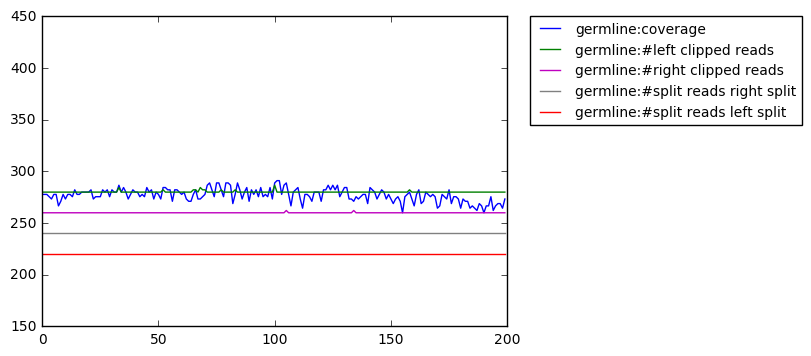

id: 1
Nanopore: DEL_start


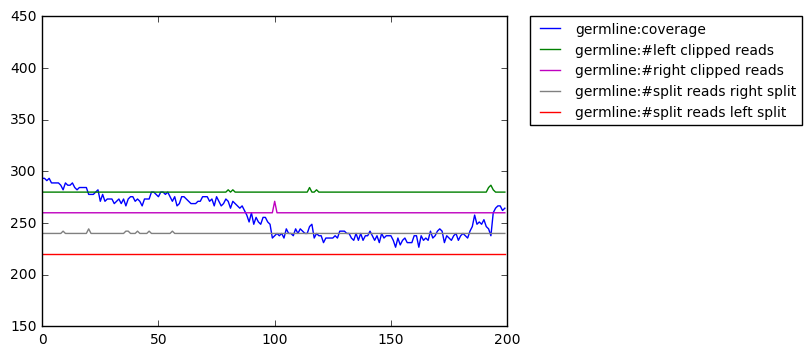

id: 2
Nanopore: DEL_start


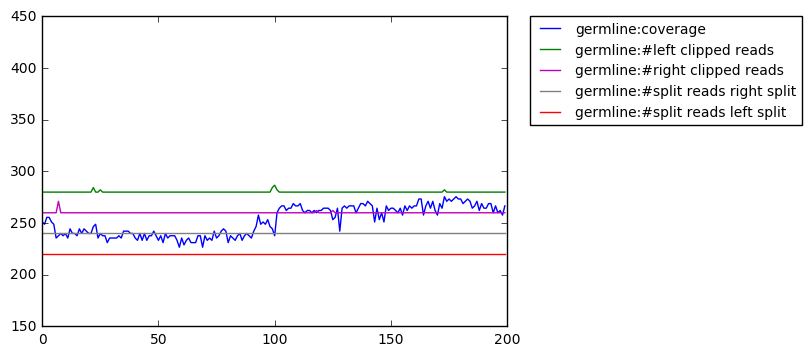

id: 3
Nanopore: DEL_end


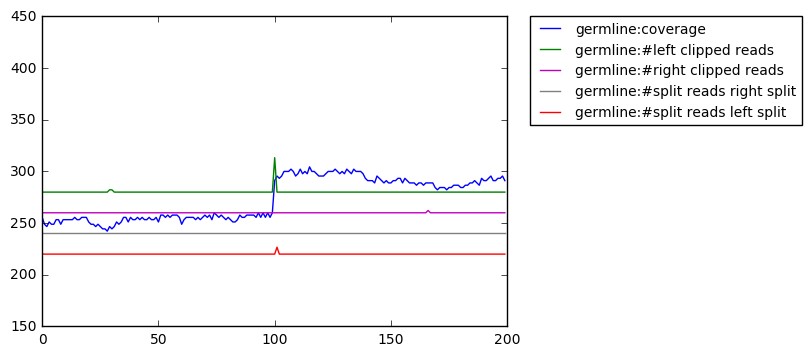

id: 4
Nanopore: DEL_start


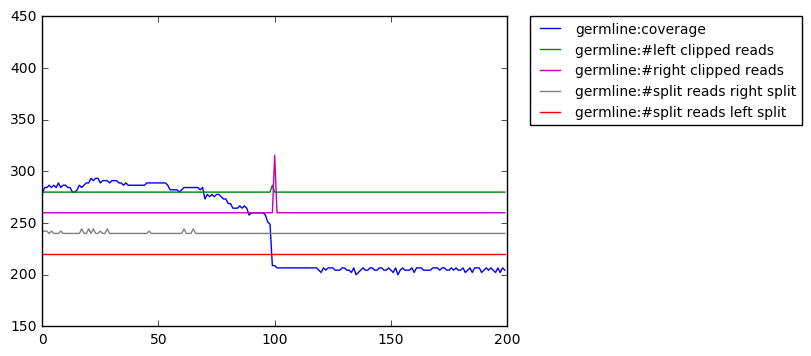

id: 5
Nanopore: DEL_start


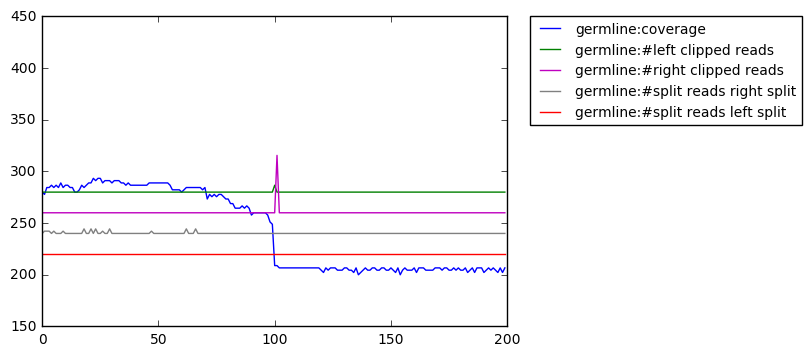

id: 6
Nanopore: DEL_end


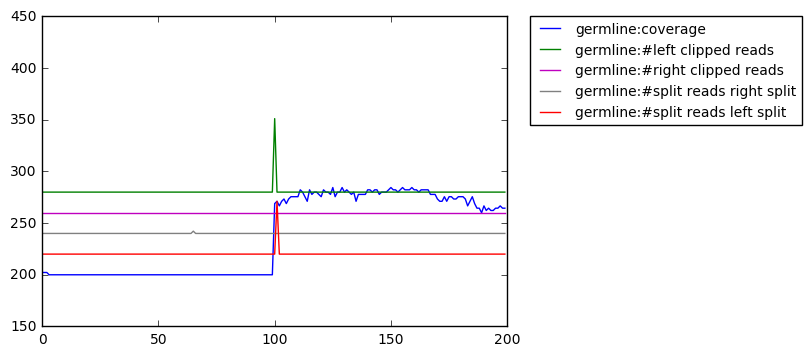

id: 7
Nanopore: DEL_start


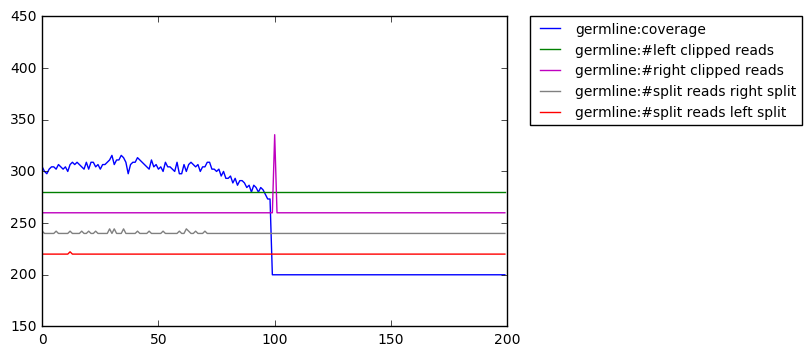

id: 8
Nanopore: DEL_end


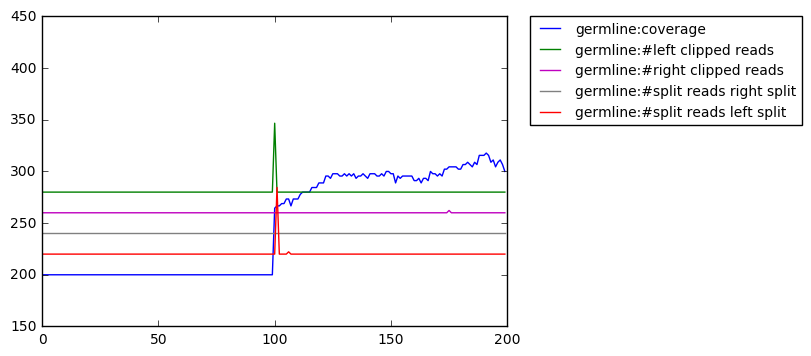

id: 9
Nanopore: DEL_start


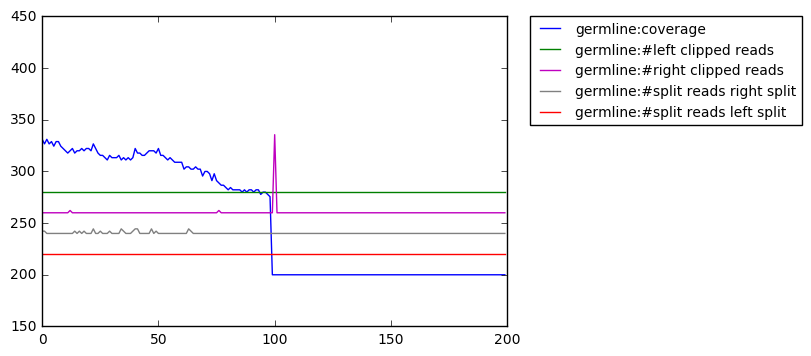

id: 10
Nanopore: DEL_end


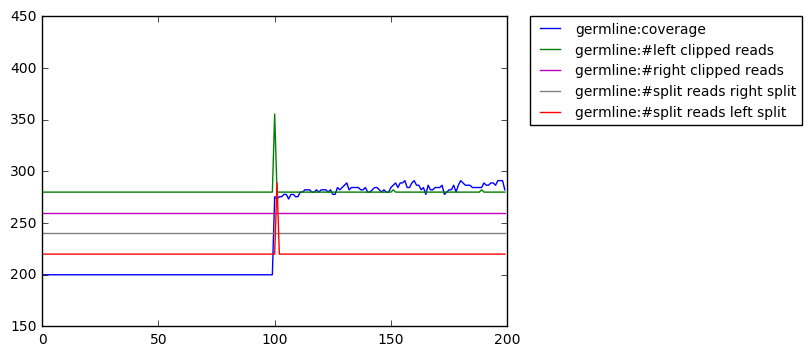

id: 11
Nanopore: DEL_start


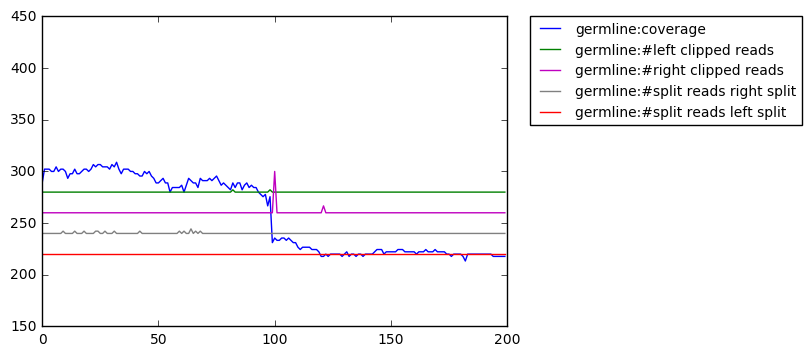

id: 12
Nanopore: DEL_start


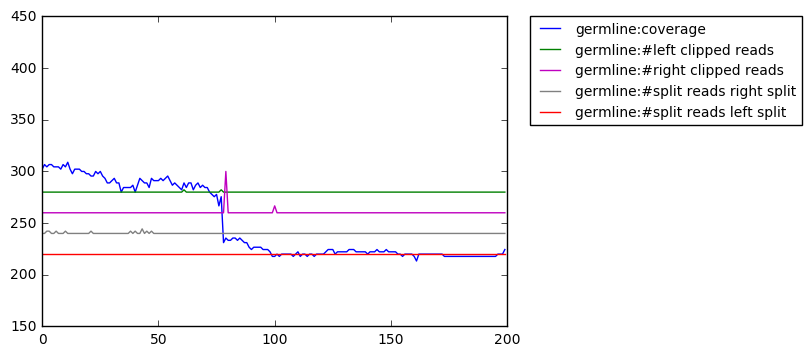

id: 13
Nanopore: DEL_end


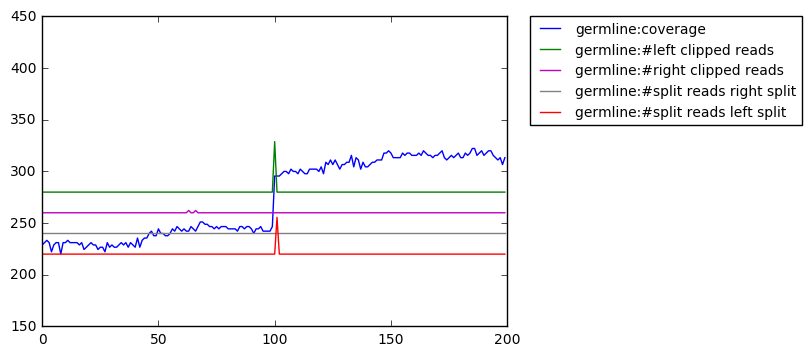

id: 14
Nanopore: DEL_start


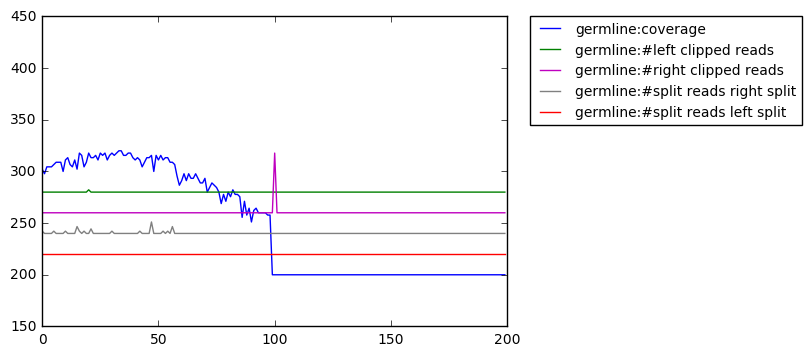

id: 15
Nanopore: DEL_end


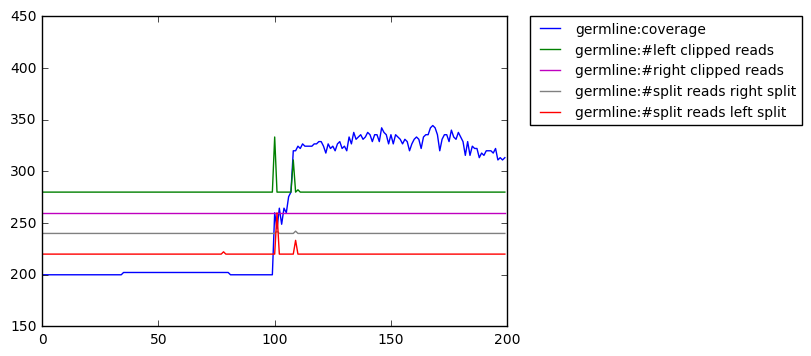

id: 16
Nanopore: DEL_end


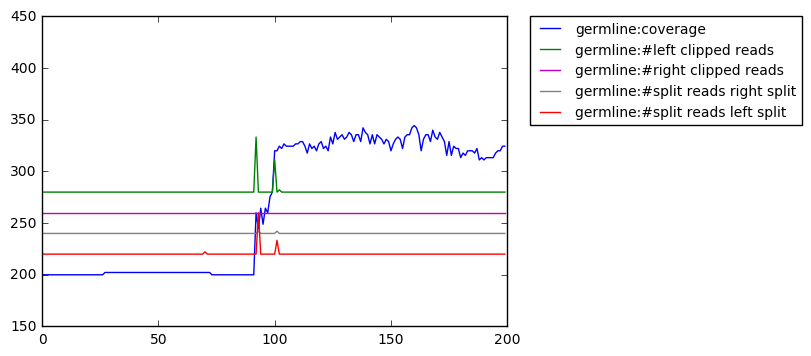

id: 17
Nanopore: DEL_start


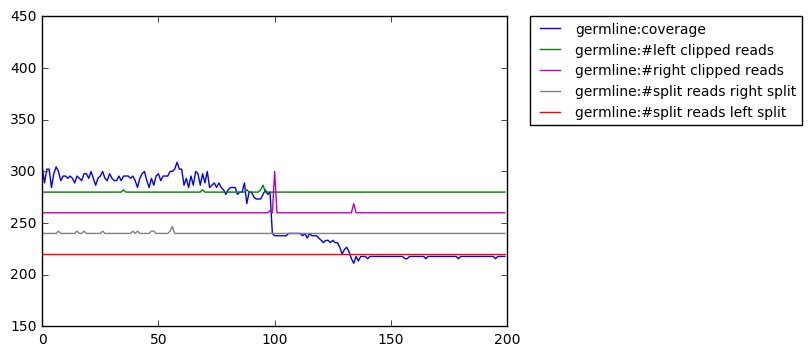

id: 18
Nanopore: DEL_start


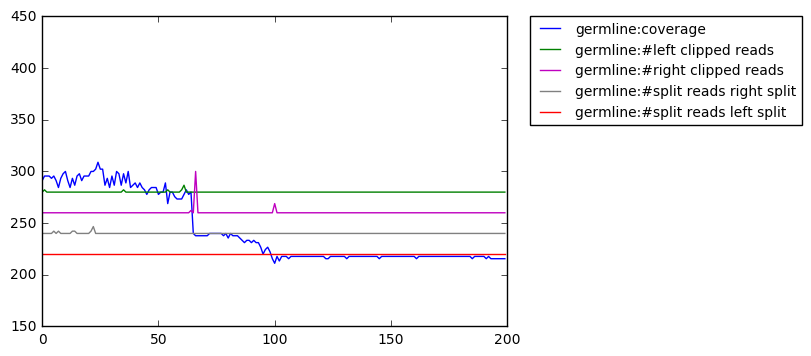

id: 19
Nanopore: DEL_start


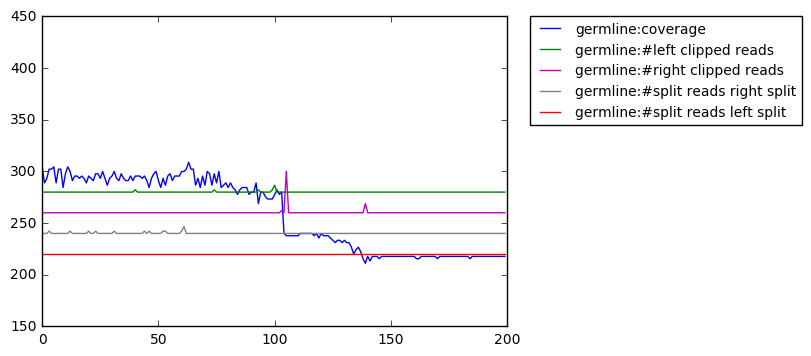

id: 20
Nanopore: DEL_end


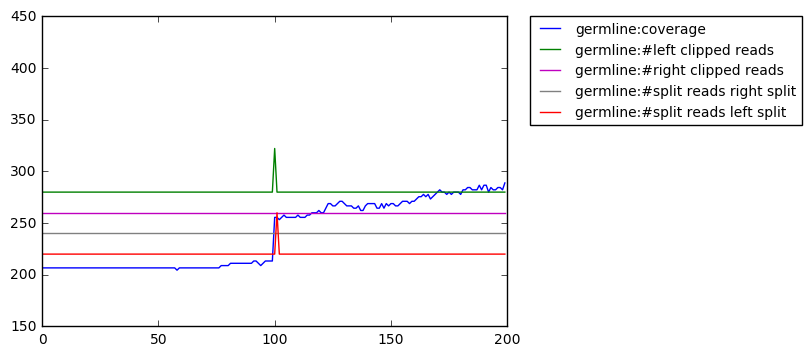

id: 21
Nanopore: DEL_start


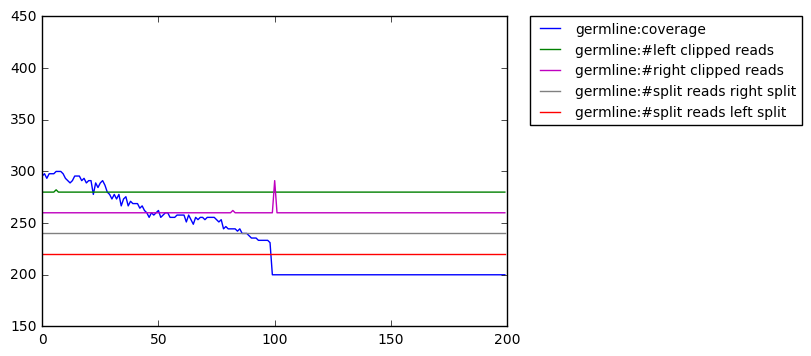

id: 22
Nanopore: DEL_end


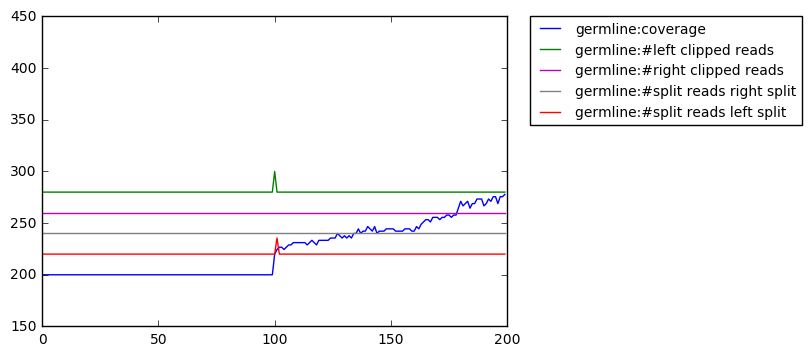

id: 23
Nanopore: DEL_start


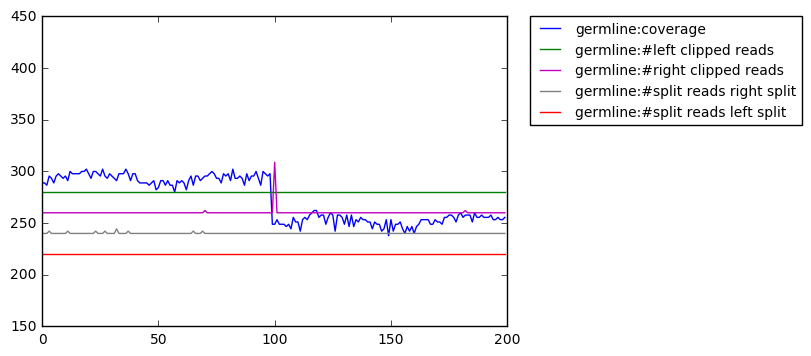

id: 24
Nanopore: DEL_end


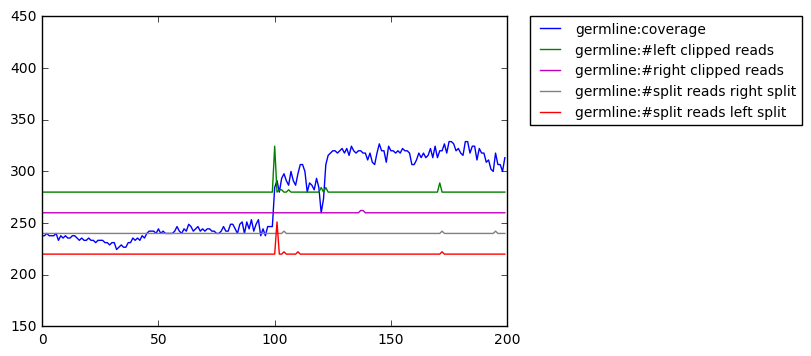

id: 25
Nanopore: DEL_end


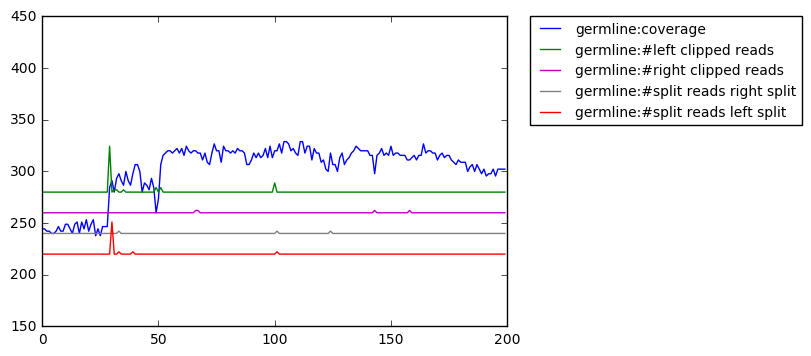

id: 26
Nanopore: DEL_start


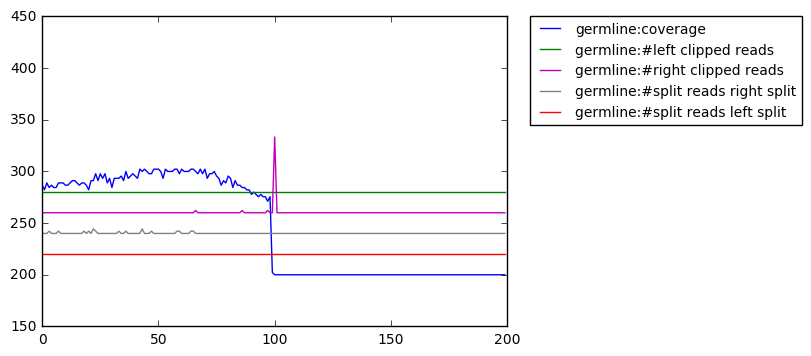

id: 27
Nanopore: DEL_end


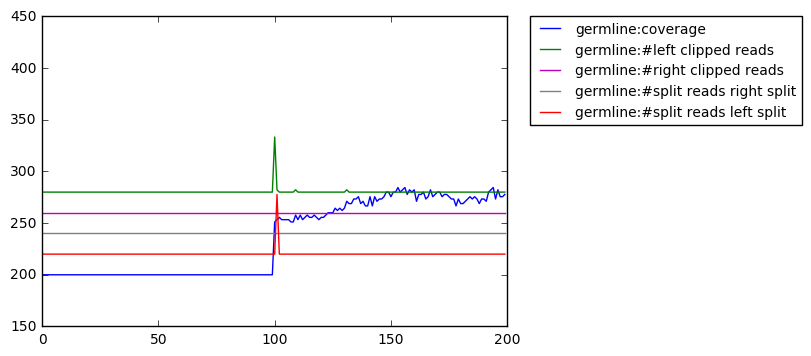

id: 28
Nanopore: DEL_end


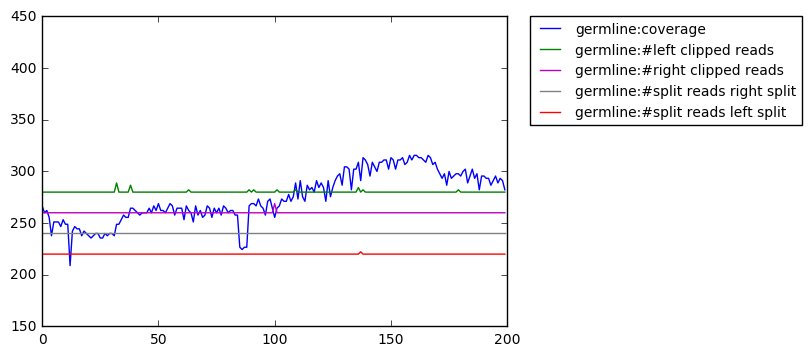

id: 29
Nanopore: DEL_end


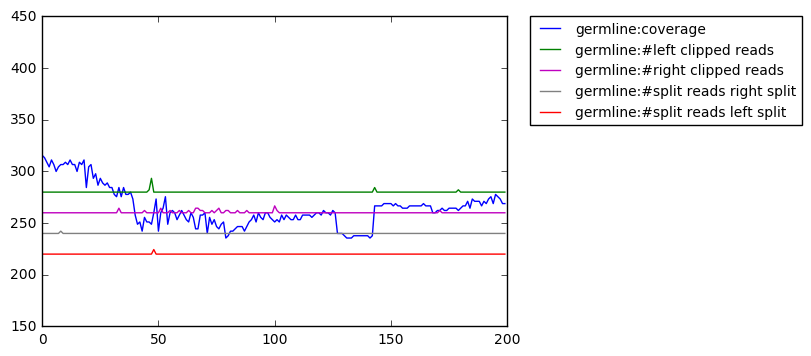

id: 30
Nanopore: DEL_start


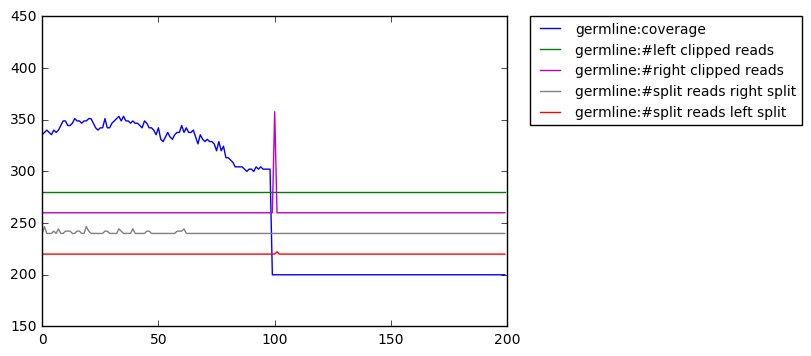

id: 31
Nanopore: DEL_end


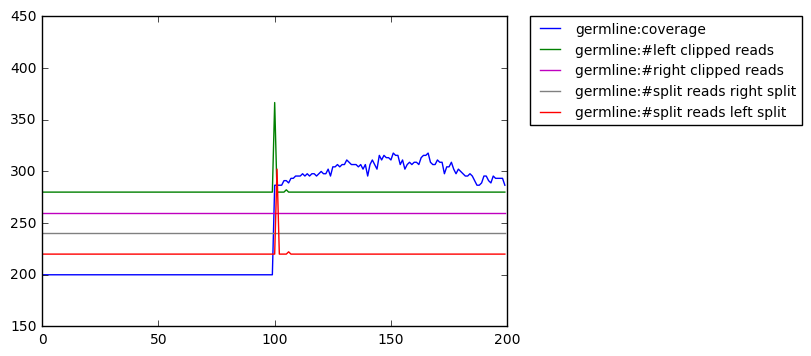

id: 32
Nanopore: DEL_start


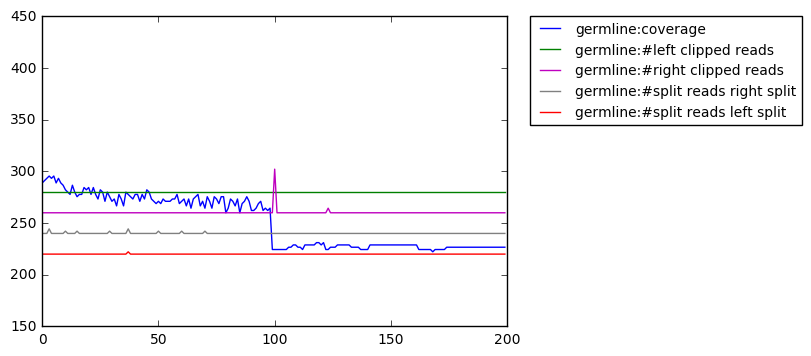

id: 33
Nanopore: DEL_end


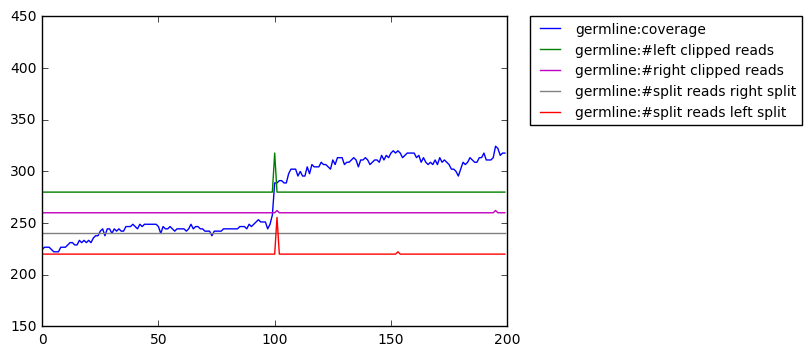

id: 34
Nanopore: DEL_start


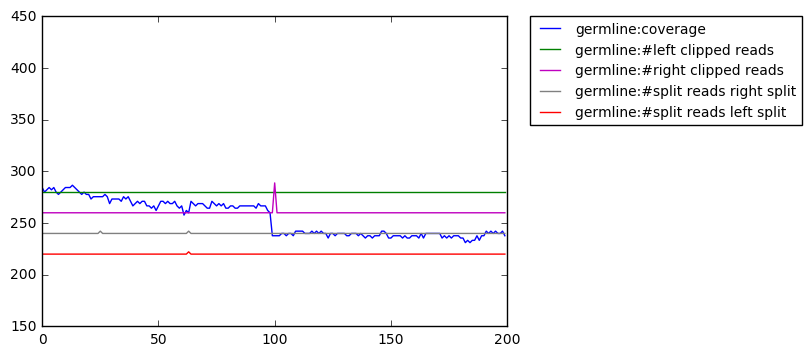

id: 35
Nanopore: DEL_end


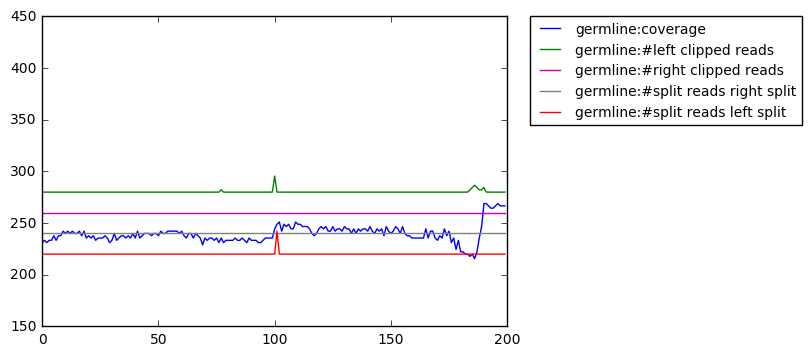

id: 36
Nanopore: DEL_end


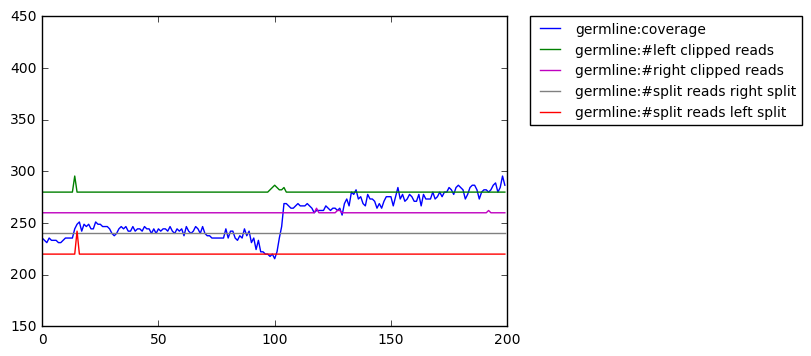

id: 37
Nanopore: DEL_start


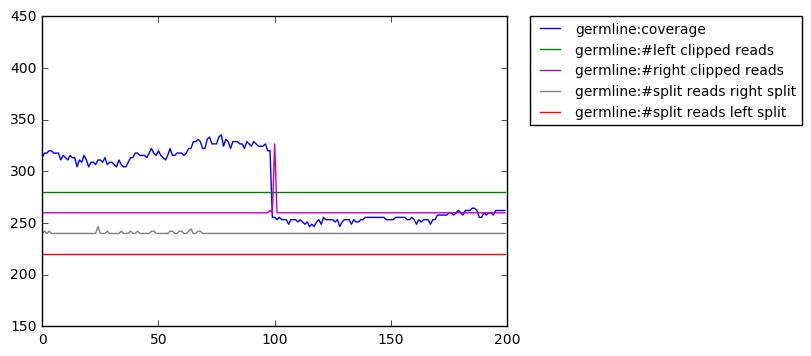

id: 38
Nanopore: DEL_end


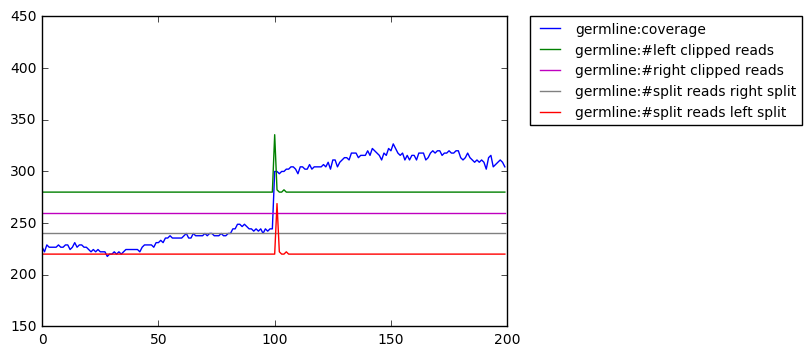

id: 39
Nanopore: DEL_start


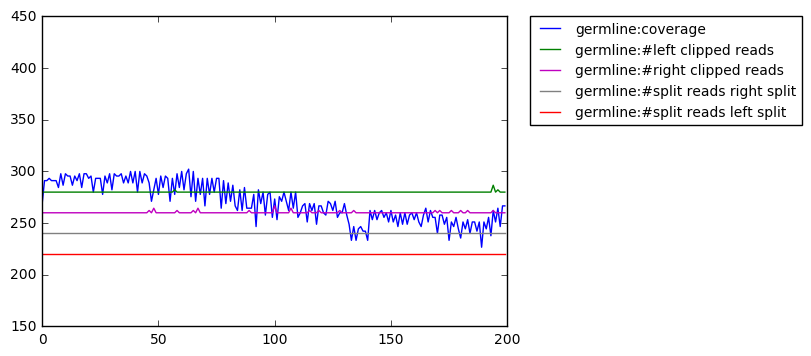

id: 40
Nanopore: DEL_start


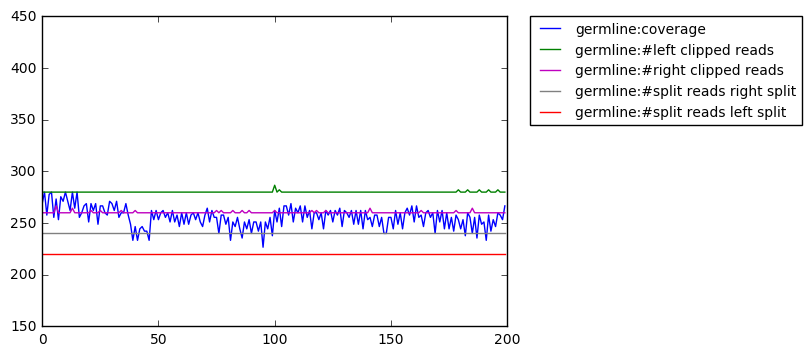

id: 41
Nanopore: DEL_start


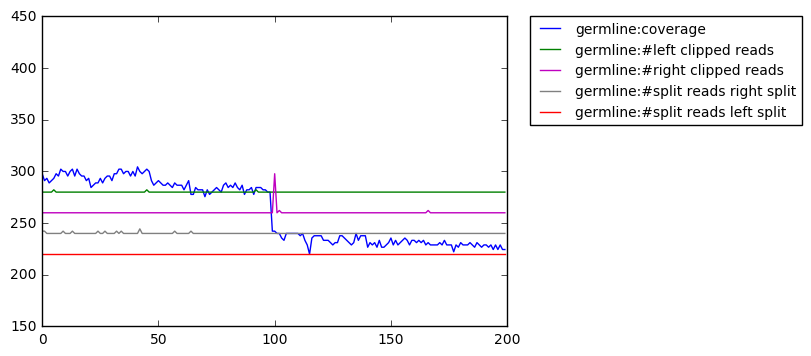

id: 42
Nanopore: DEL_end


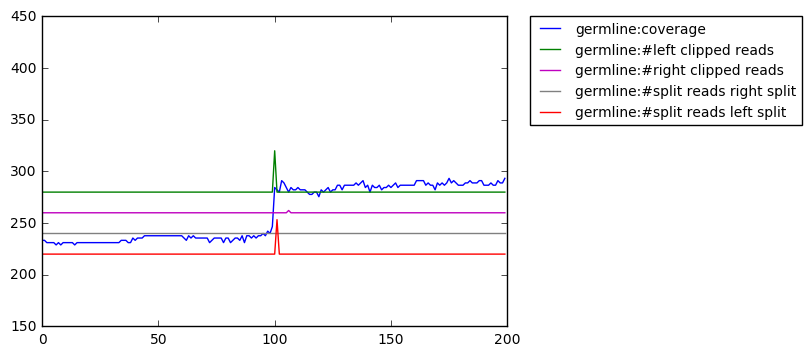

id: 43
Nanopore: DEL_start


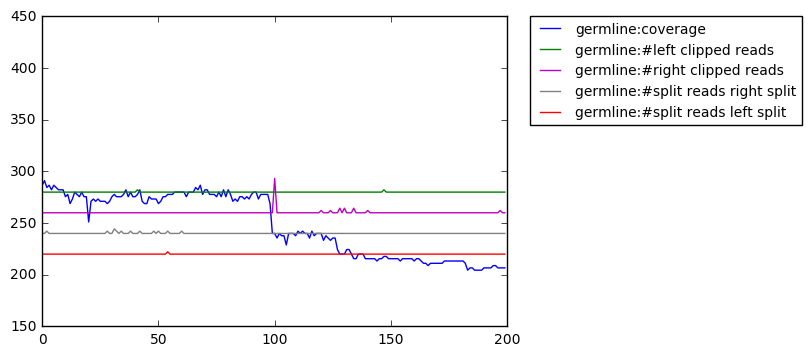

id: 44
Nanopore: DEL_start


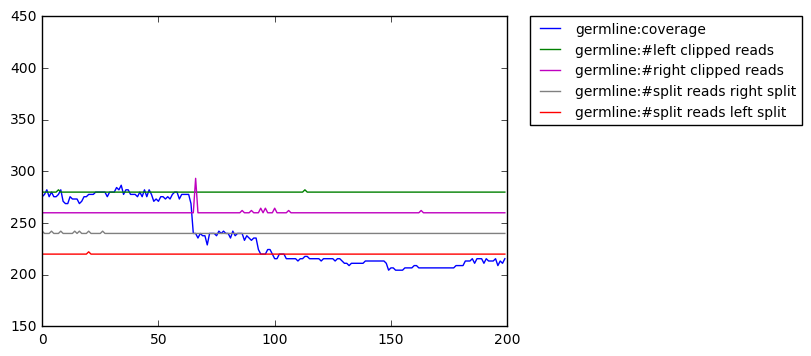

id: 45
Nanopore: DEL_end


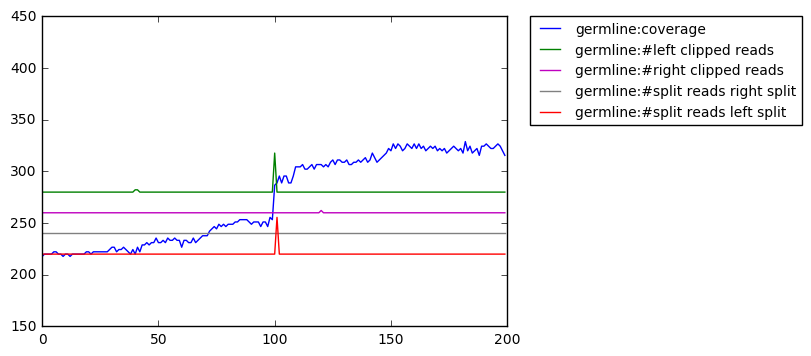

id: 46
Nanopore: DEL_start


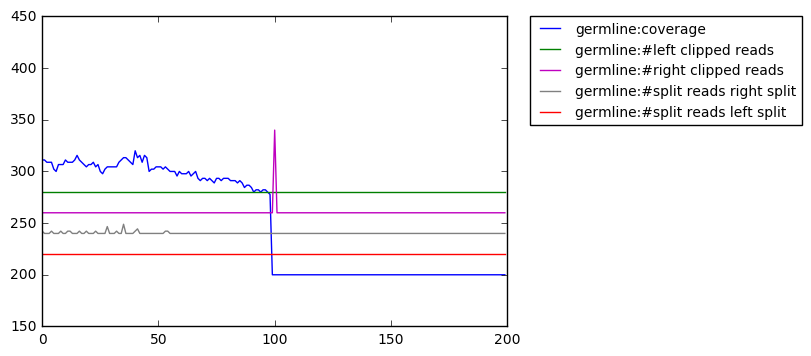

id: 47
Nanopore: DEL_end


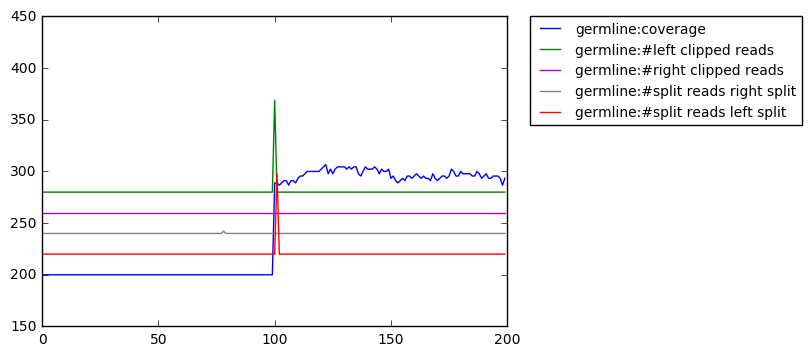

id: 48
Nanopore: DEL_start


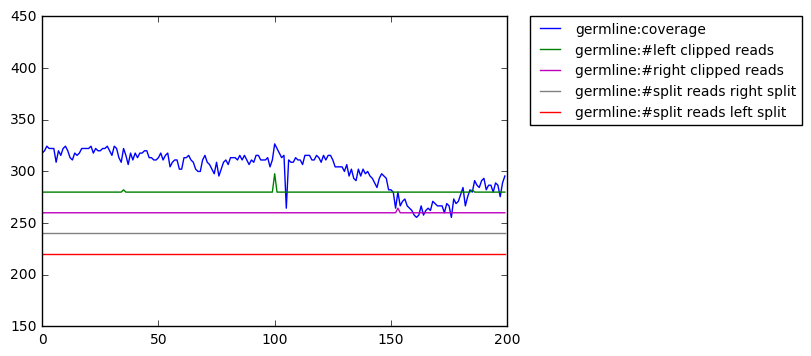

id: 49
Nanopore: DEL_end


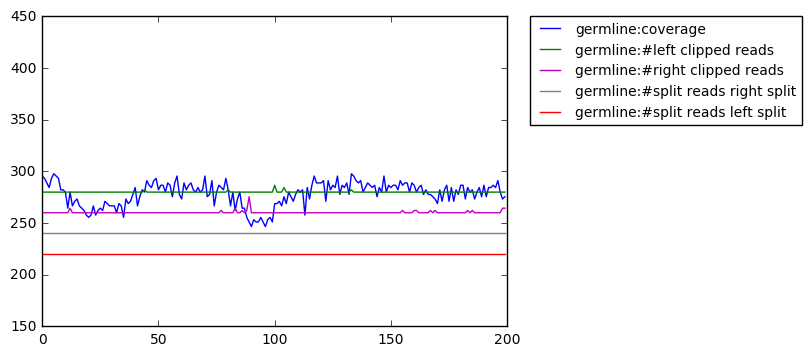

id: 50
Nanopore: DEL_end


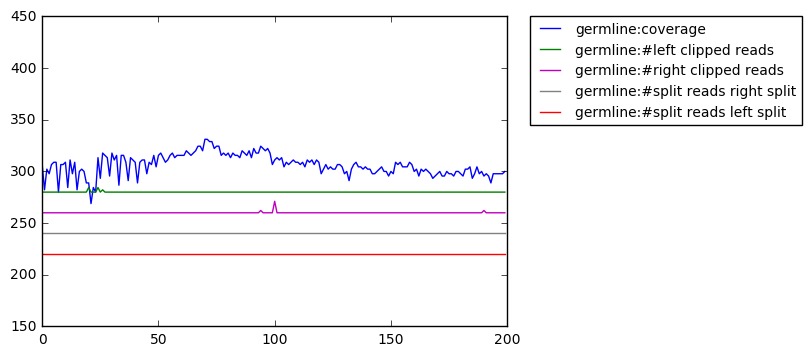

id: 51
Nanopore: DEL_start


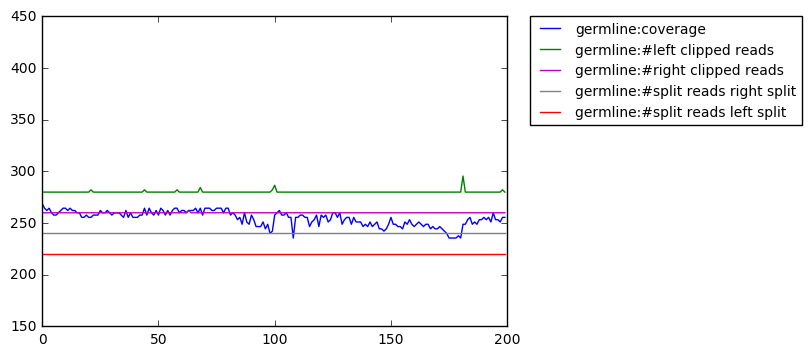

id: 52
Nanopore: DEL_start


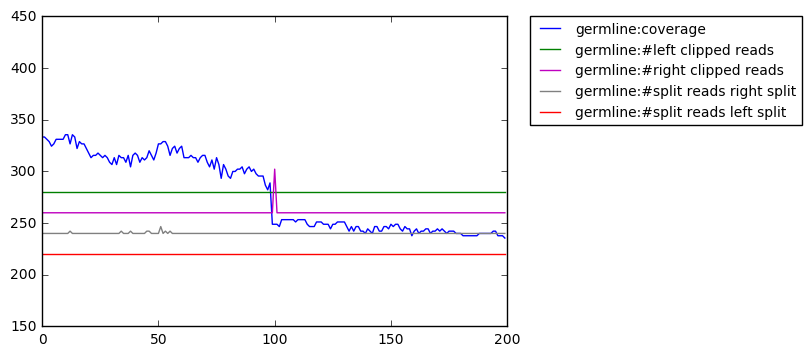

id: 53
Nanopore: DEL_end


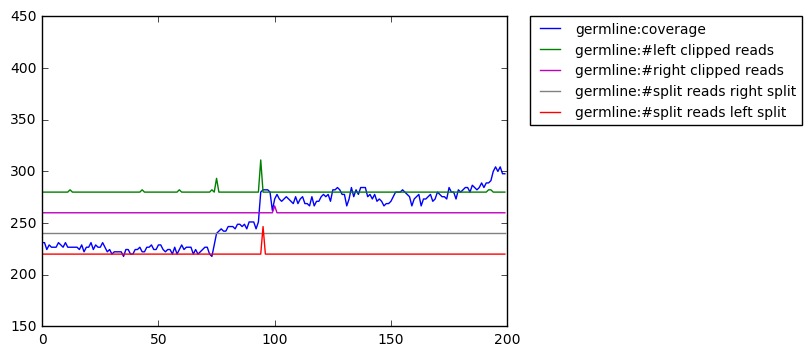

id: 54
Nanopore: DEL_end


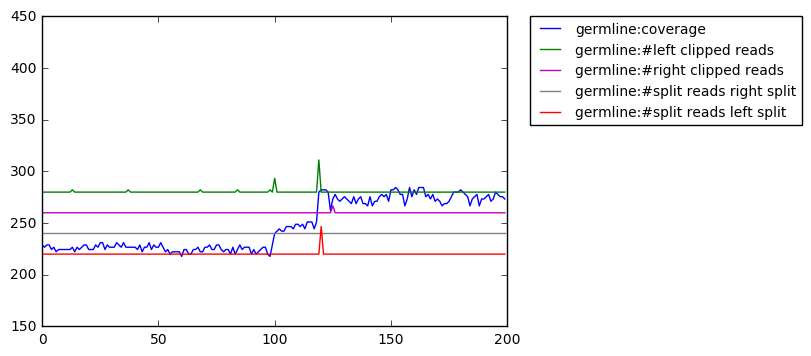

id: 55
Nanopore: DEL_end


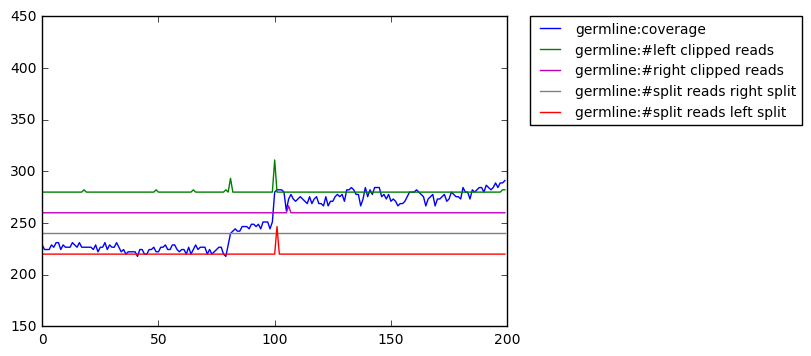

id: 56
Nanopore: DEL_start


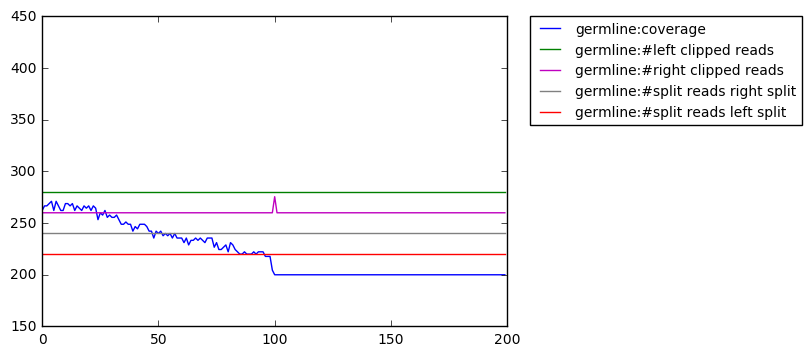

id: 57
Nanopore: DEL_end


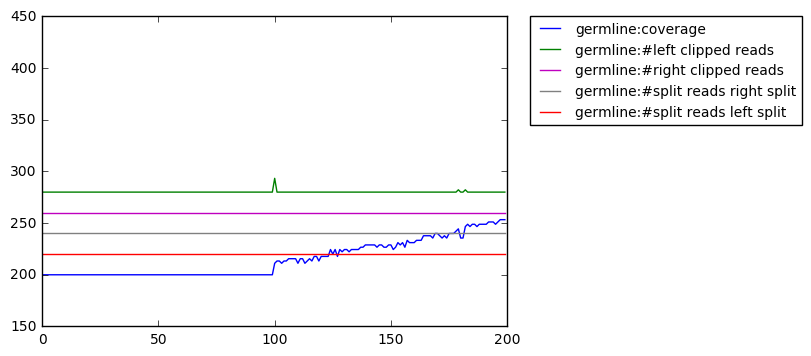

id: 58
Nanopore: DEL_end


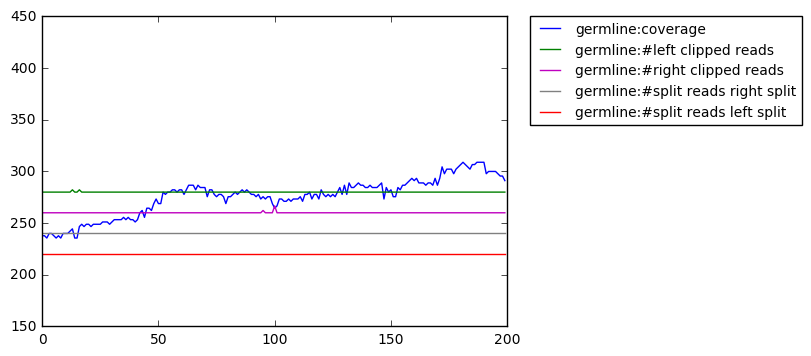

id: 59
Nanopore: DEL_start


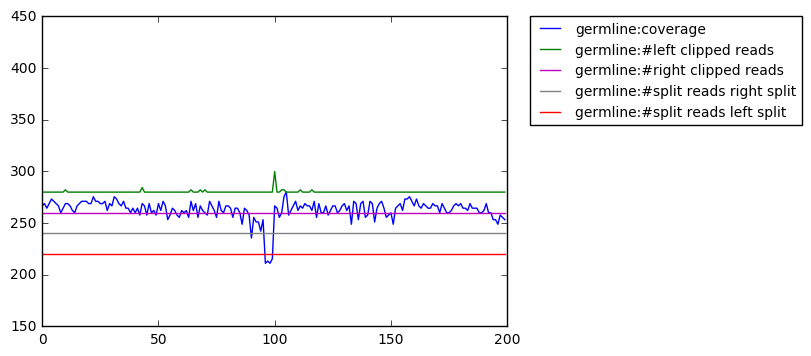

id: 60
Nanopore: DEL_end


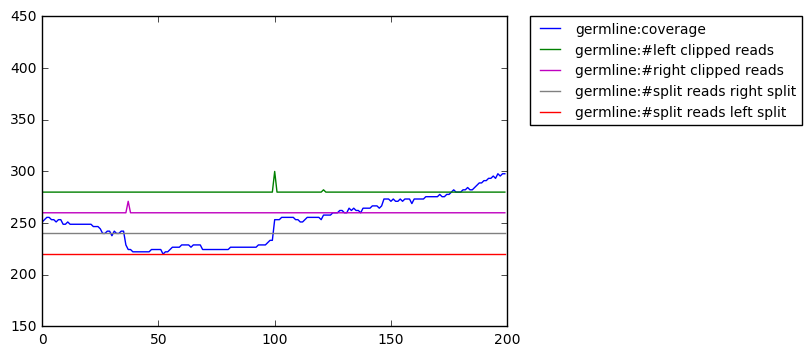

id: 61
Nanopore: DEL_start


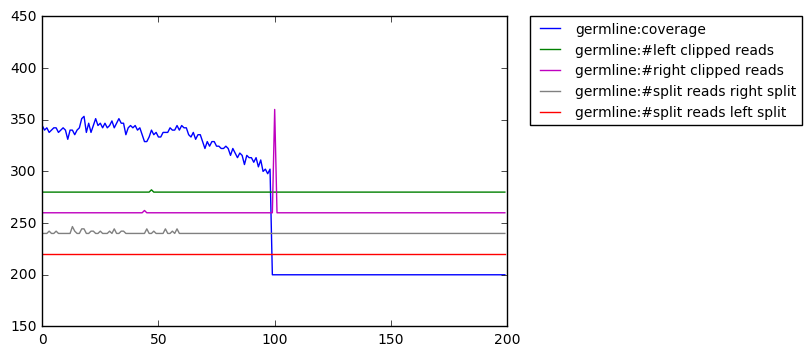

id: 62
Nanopore: DEL_end


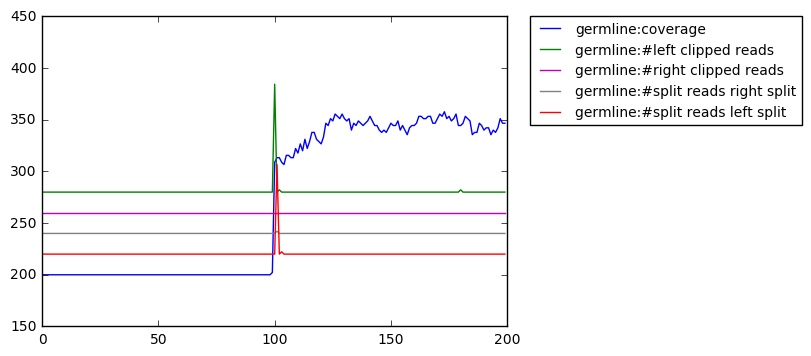

id: 63
Nanopore: DEL_start


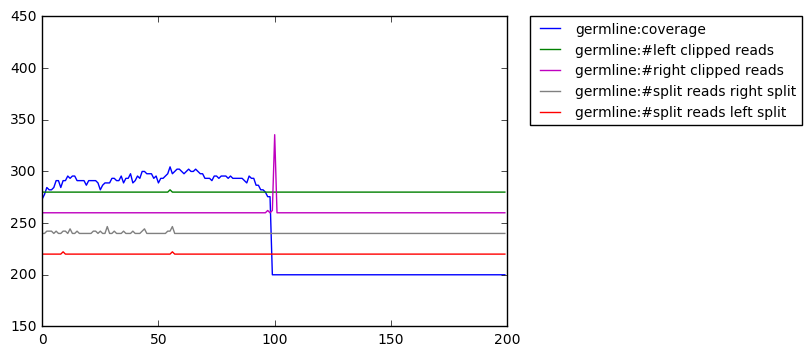

id: 64
Nanopore: DEL_end


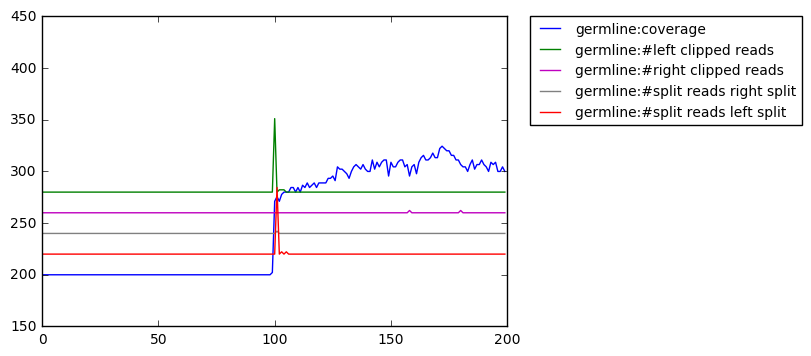

id: 65
Nanopore: DEL_start


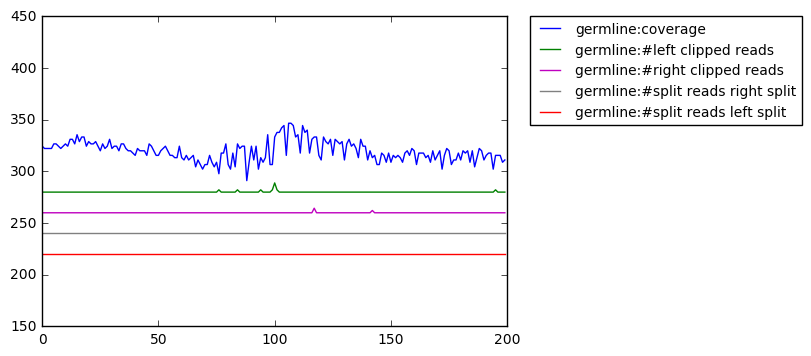

id: 66
Nanopore: DEL_start


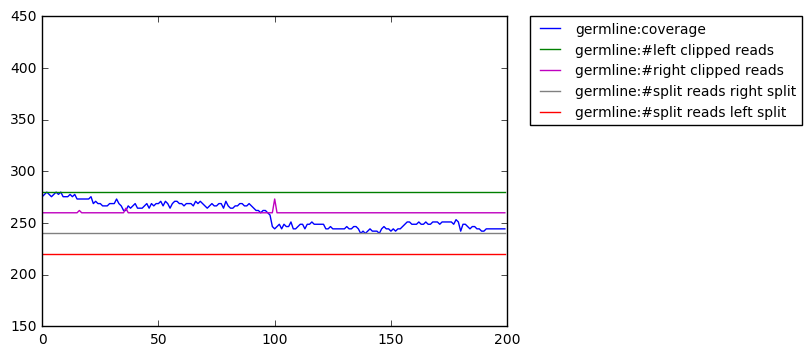

id: 67
Nanopore: DEL_end


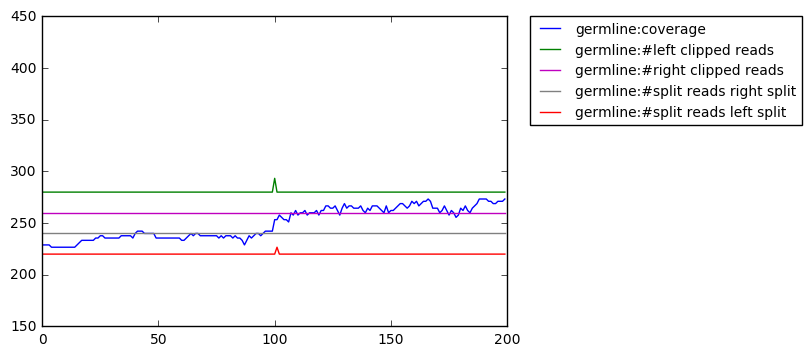

id: 68
Nanopore: DEL_start


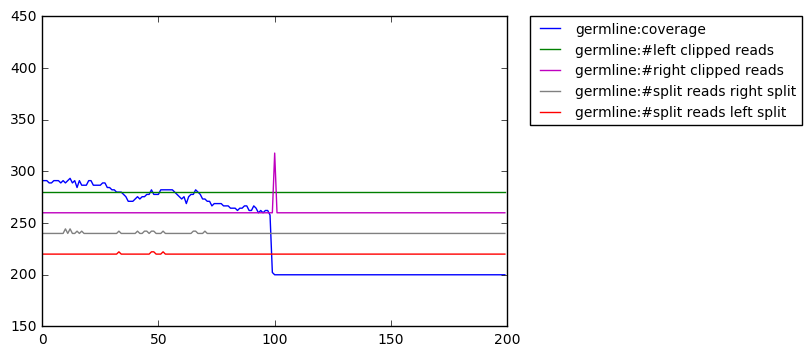

id: 69
Nanopore: DEL_end


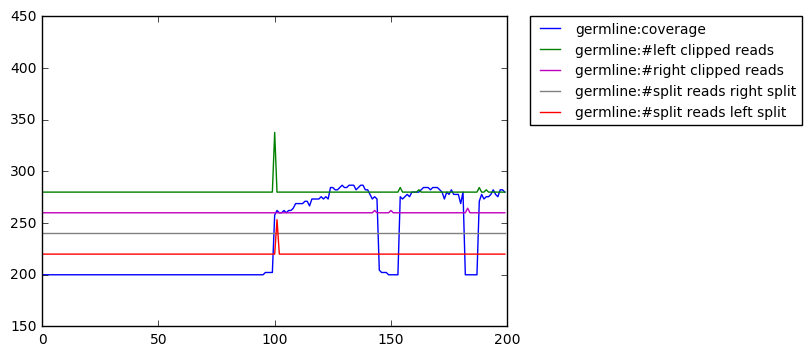

id: 70
Nanopore: DEL_end


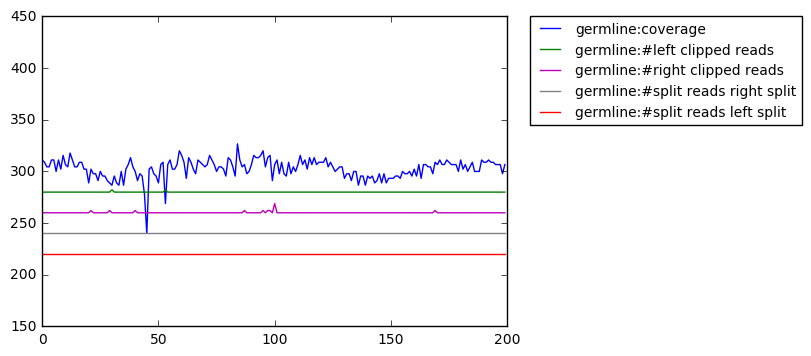

id: 71
Nanopore: DEL_start


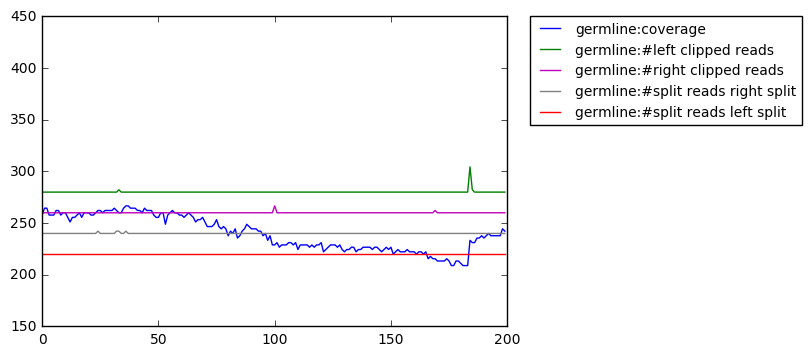

id: 72
Nanopore: DEL_end


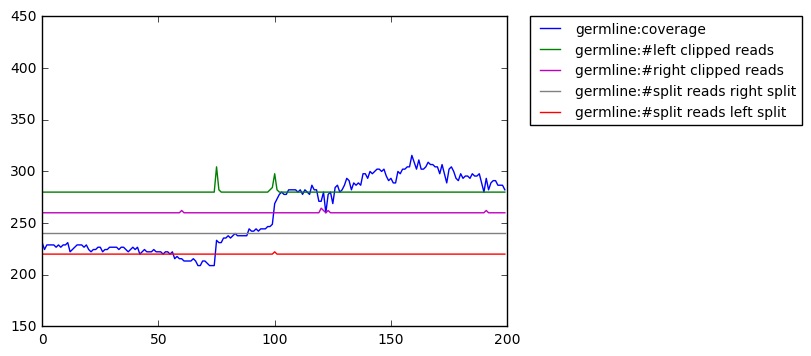

id: 73
Nanopore: DEL_start


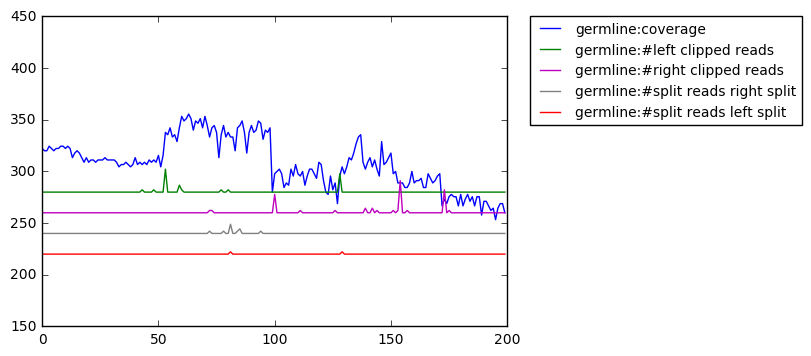

id: 74
Nanopore: DEL_start


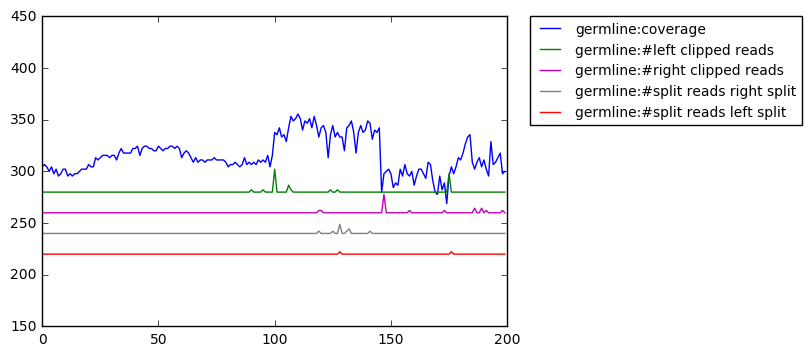

id: 75
Nanopore: DEL_start


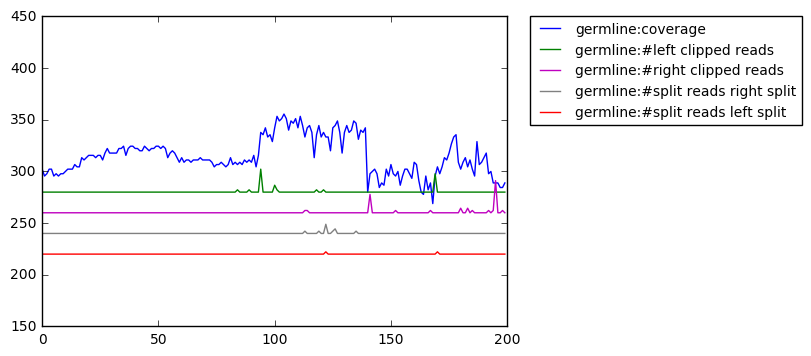

id: 76
Nanopore: DEL_start


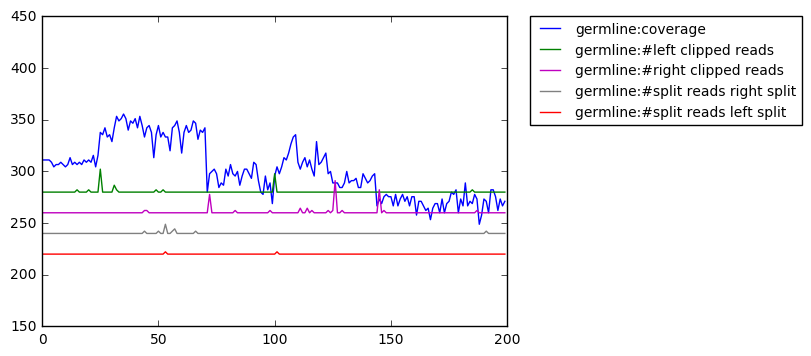

id: 77
Nanopore: DEL_start


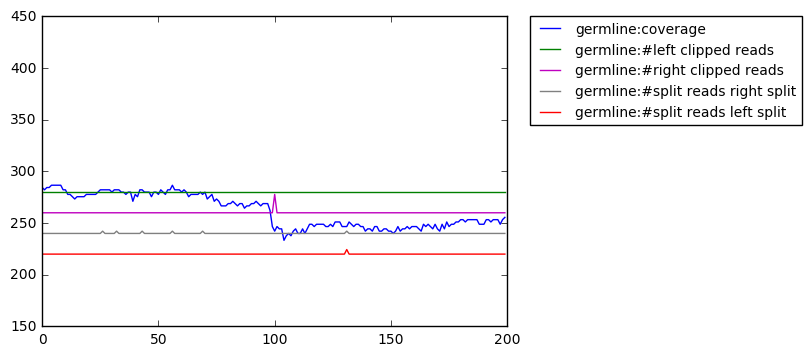

id: 78
Nanopore: DEL_end


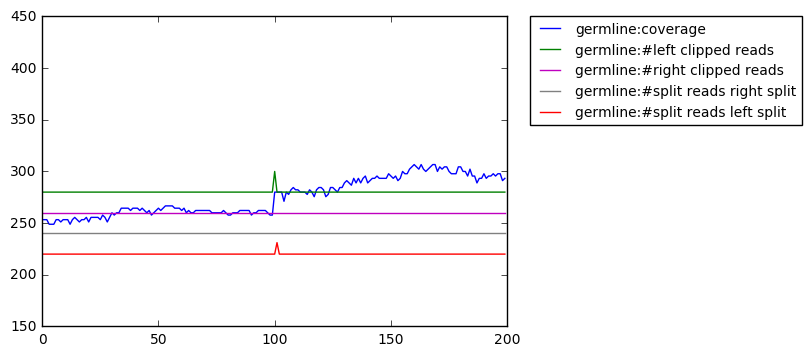

id: 79
Nanopore: DEL_start


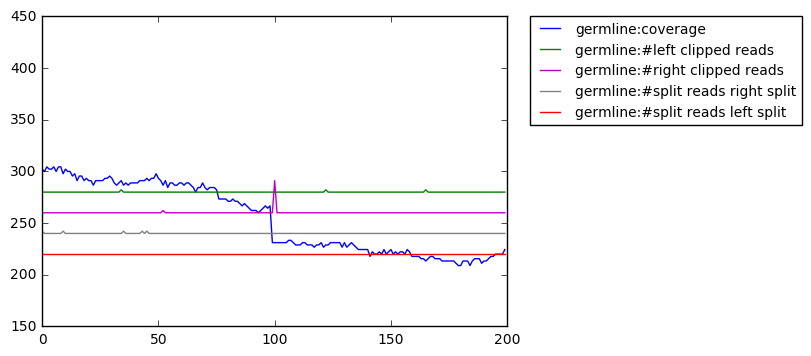

id: 80
Nanopore: DEL_end


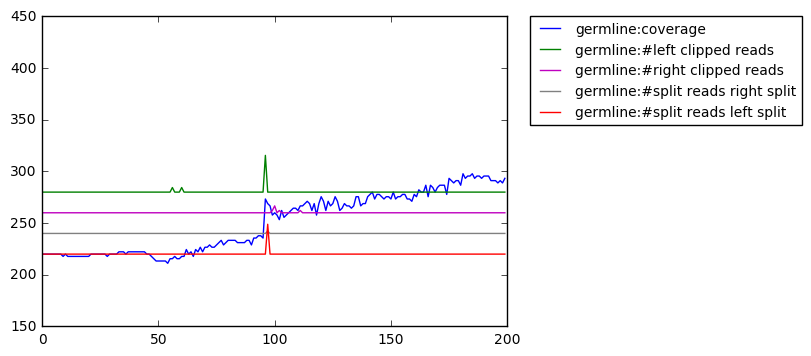

id: 81
Nanopore: DEL_end


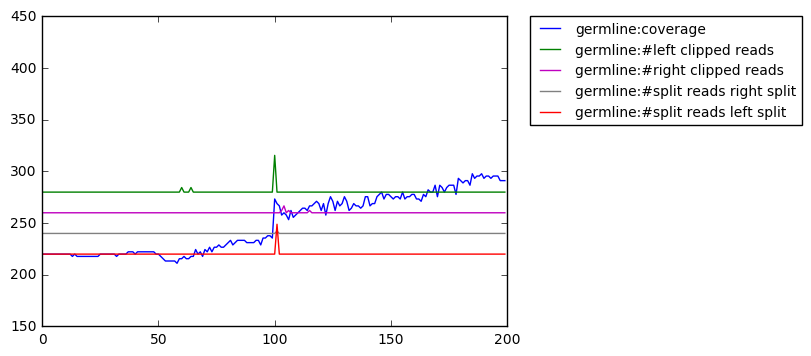

id: 82
Nanopore: DEL_start


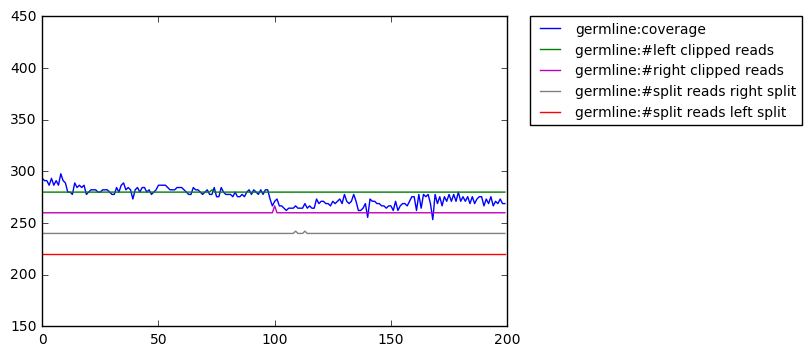

id: 83
Nanopore: DEL_start


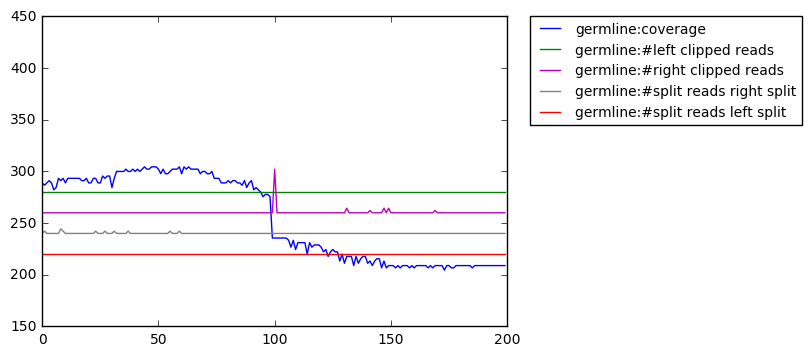

id: 84
Nanopore: DEL_end


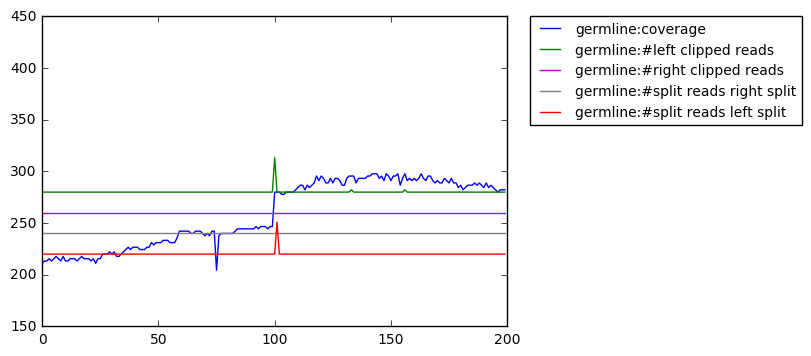

id: 85
Nanopore: DEL_start


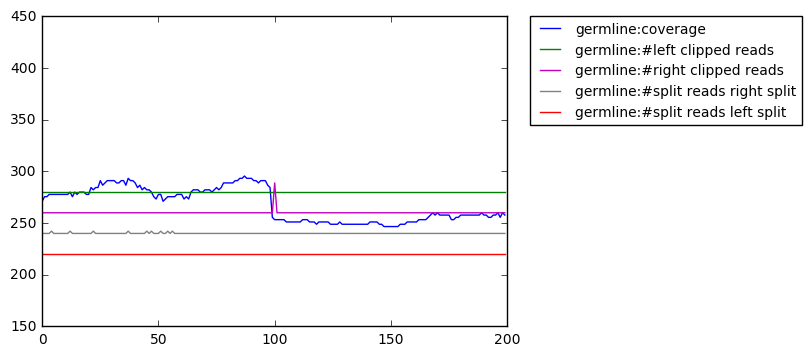

id: 86
Nanopore: DEL_end


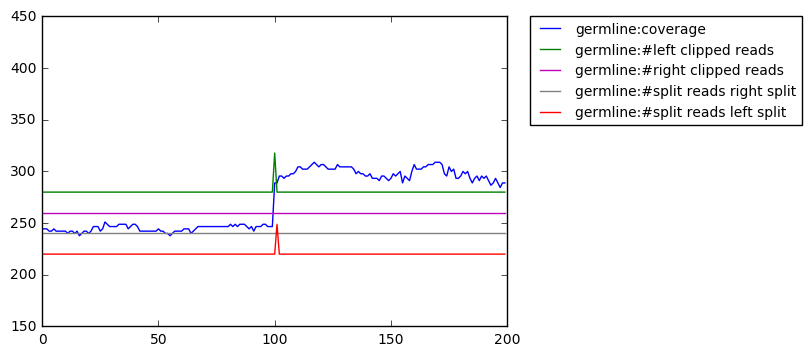

id: 87
Nanopore: noSV


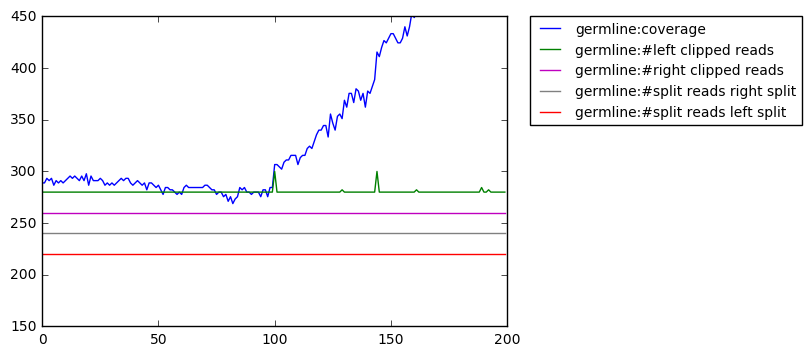

id: 88
Nanopore: noSV


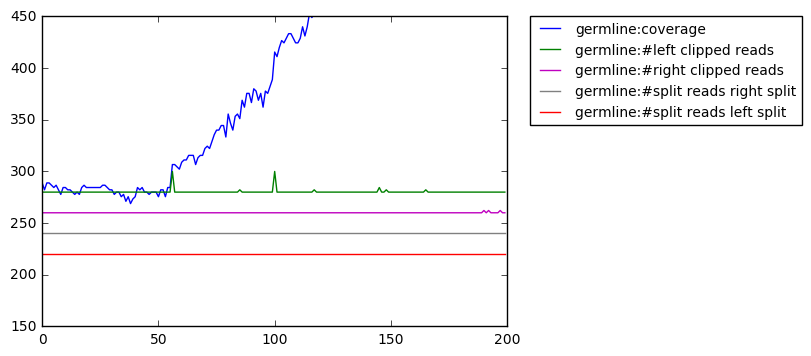

id: 89
Nanopore: noSV


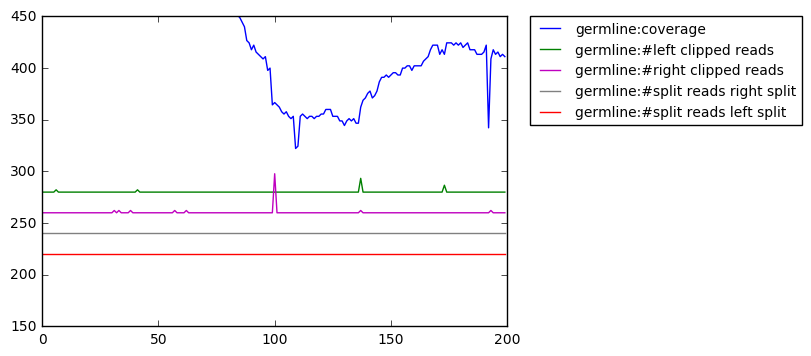

id: 90
Nanopore: noSV


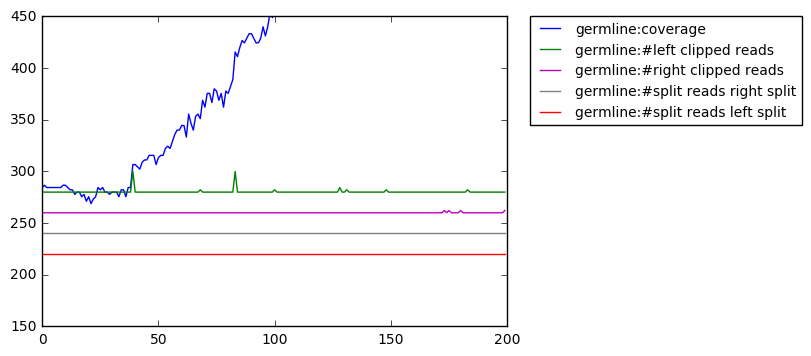

id: 91
Nanopore: noSV


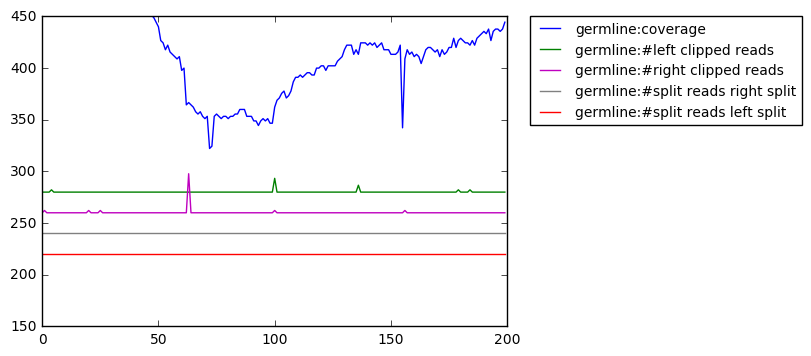

id: 92
Nanopore: noSV


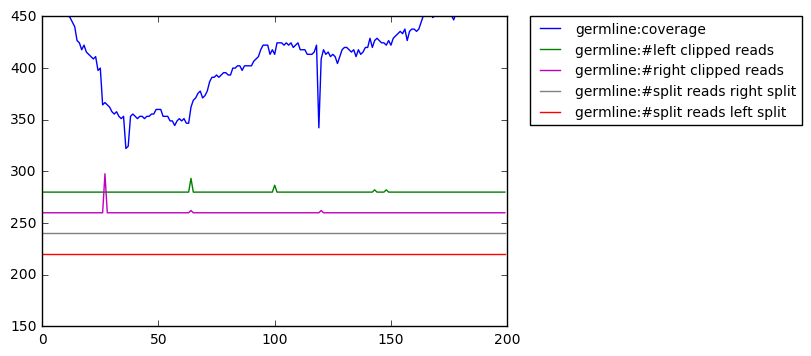

id: 93
Nanopore: noSV


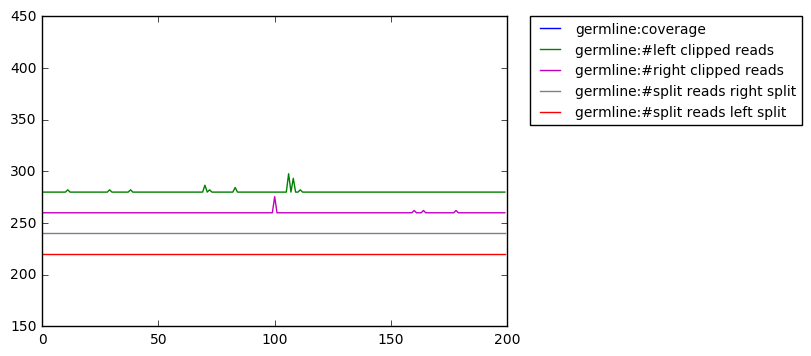

id: 94
Nanopore: noSV


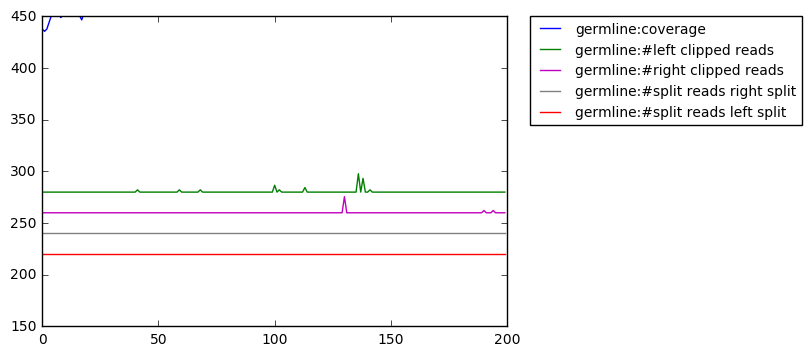

id: 95
Nanopore: noSV


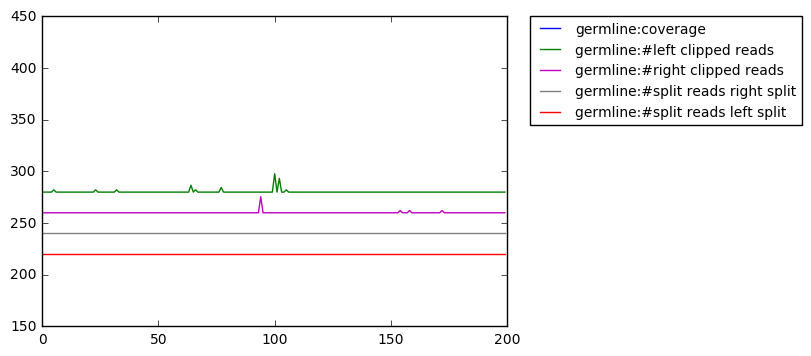

id: 96
Nanopore: noSV


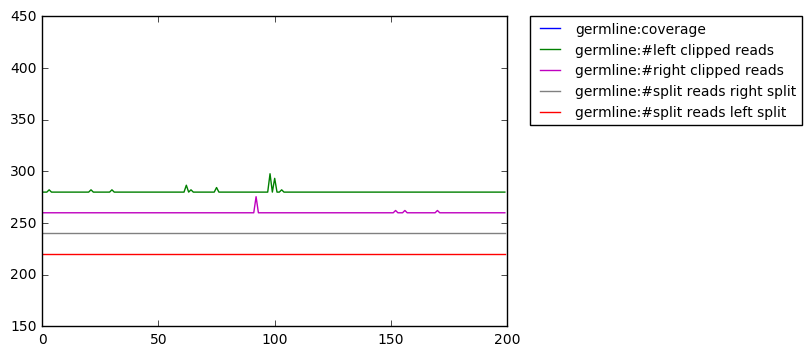

id: 97
Nanopore: noSV


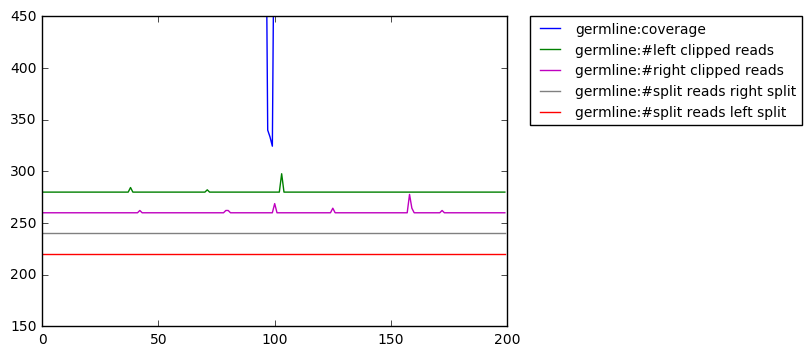

id: 98
Nanopore: noSV


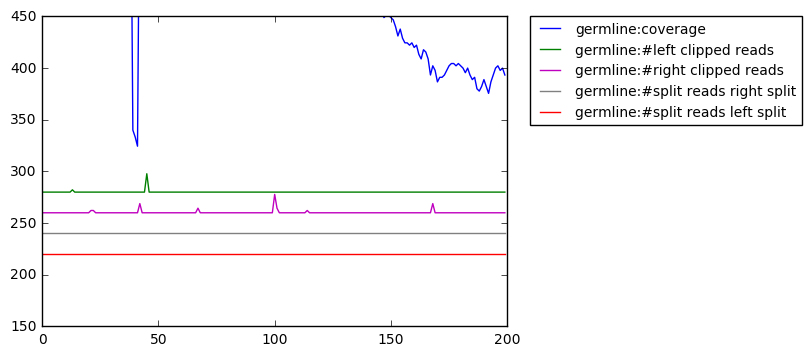

id: 99
Nanopore: noSV


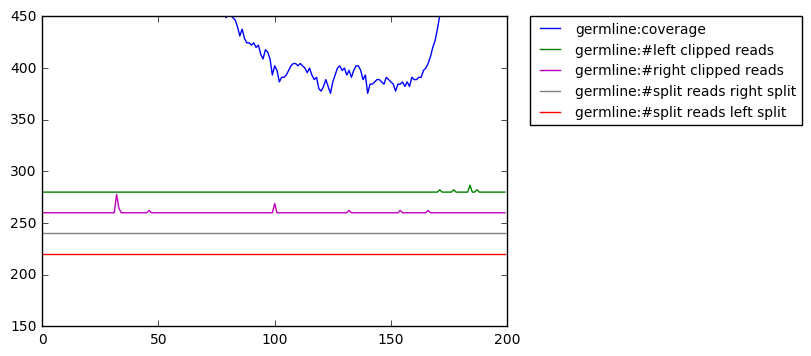

id: 100
Nanopore: noSV


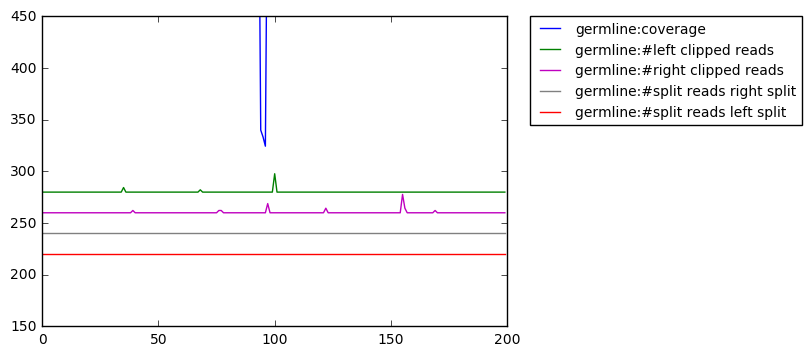

id: 101
Nanopore: noSV


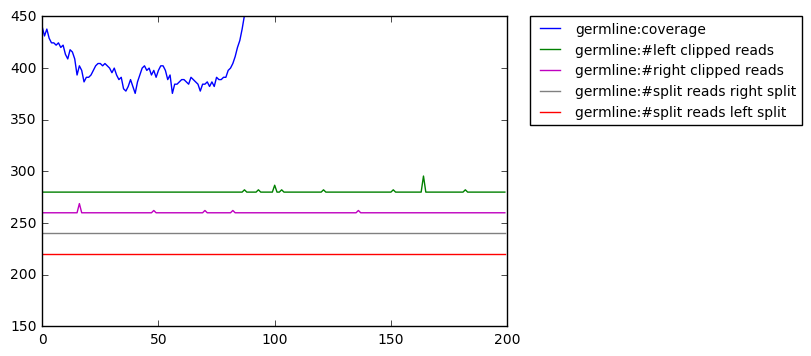

id: 102
Nanopore: noSV


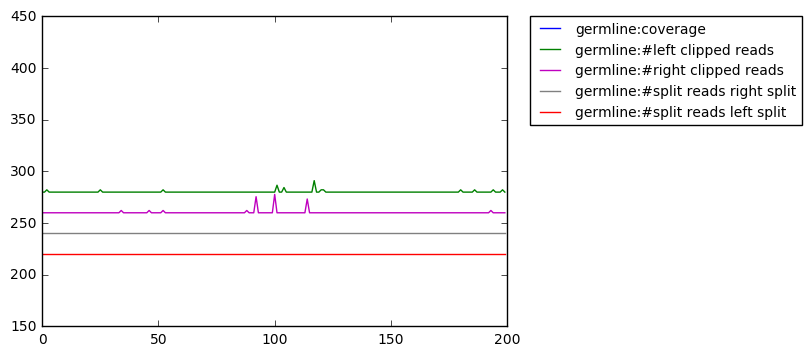

id: 103
Nanopore: noSV


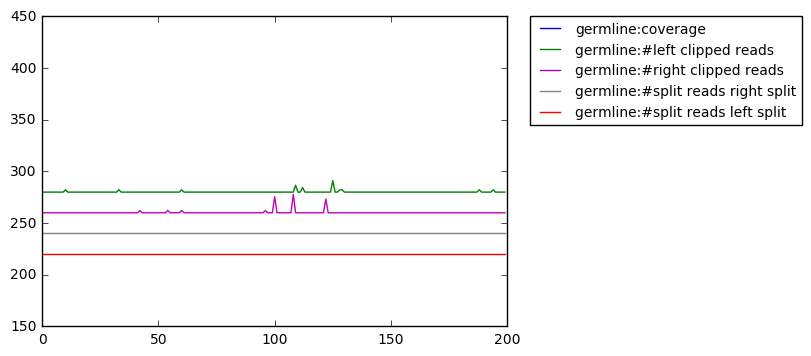

id: 104
Nanopore: noSV


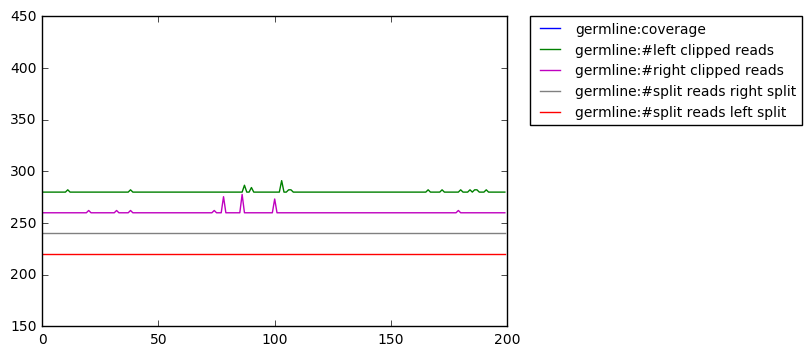

id: 105
Nanopore: noSV


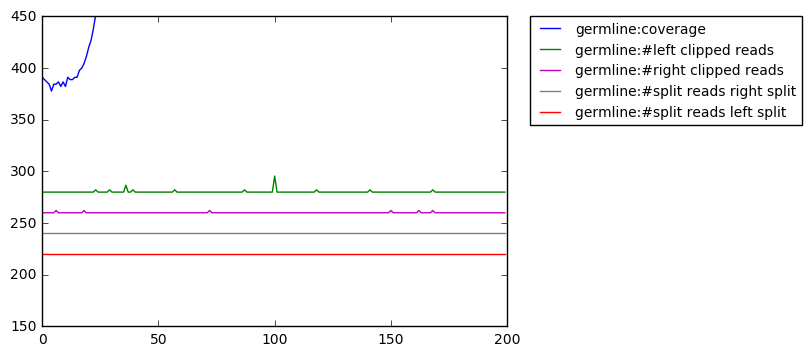

id: 106
Nanopore: noSV


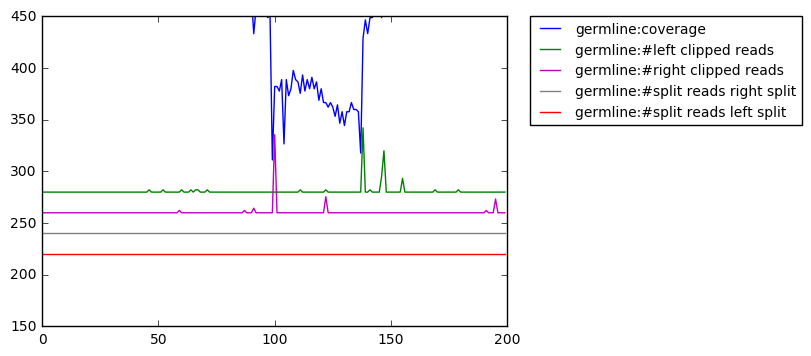

id: 107
Nanopore: noSV


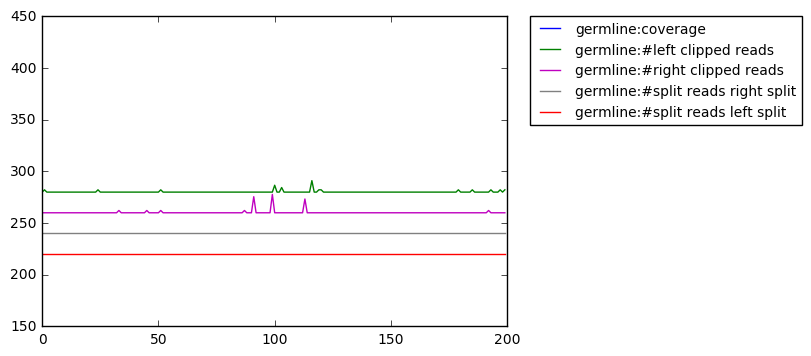

id: 108
Nanopore: noSV


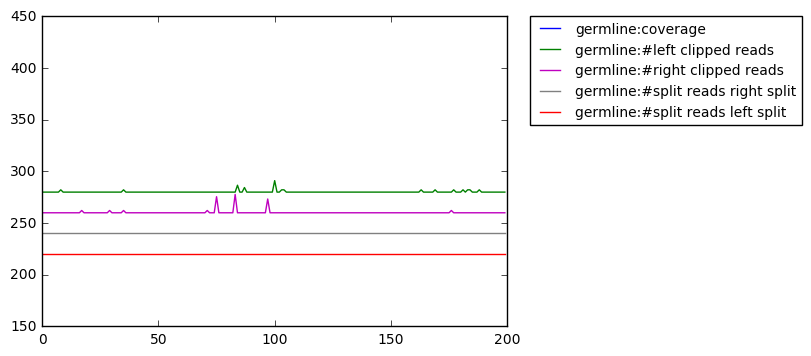

id: 109
Nanopore: noSV


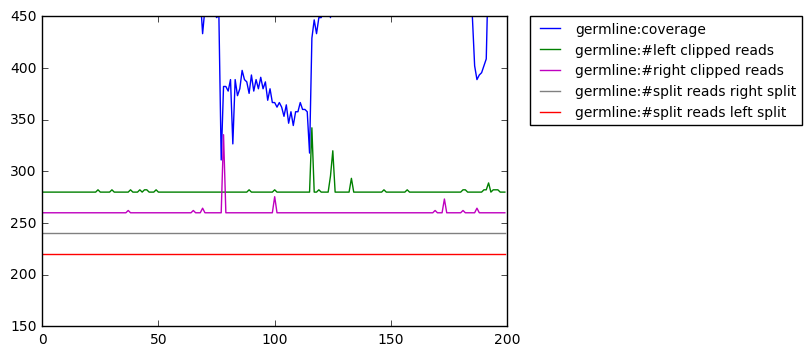

id: 110
Nanopore: noSV


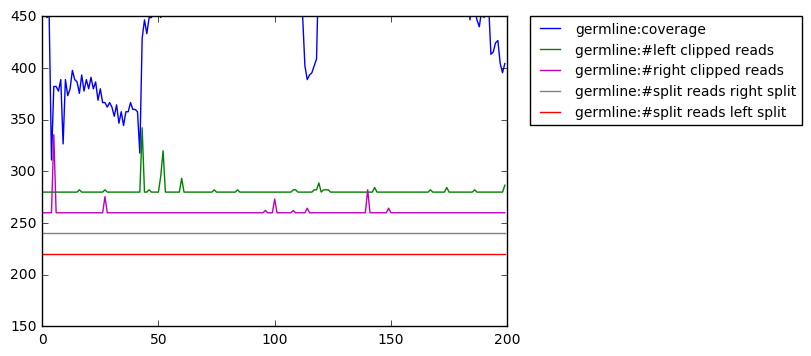

id: 111
Nanopore: noSV


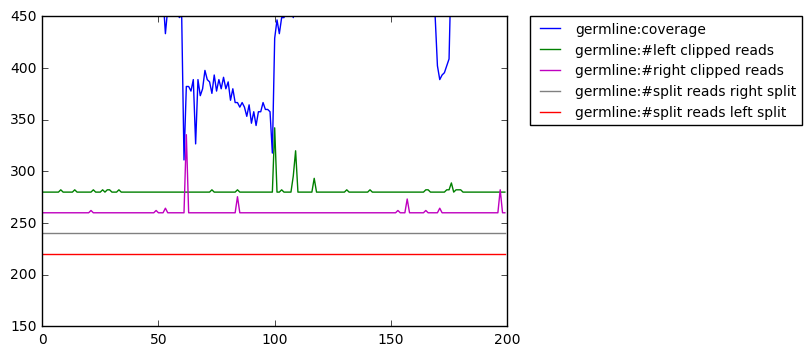

id: 112
Nanopore: noSV


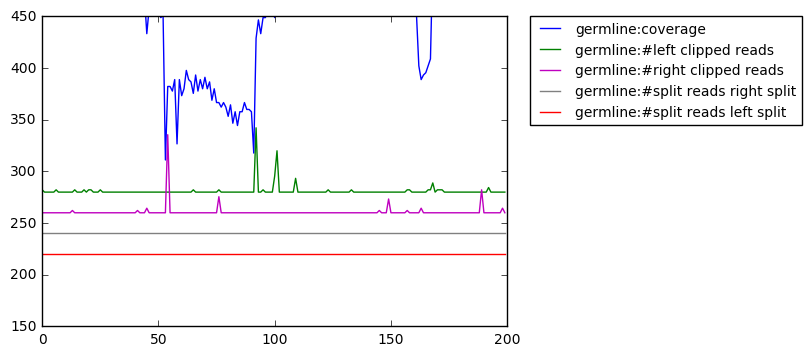

id: 113
Nanopore: noSV


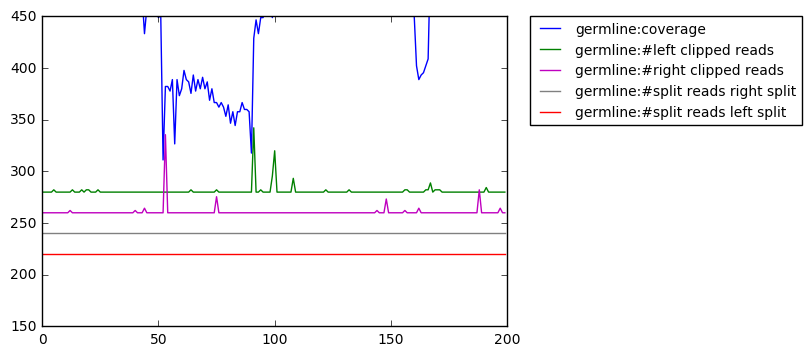

id: 114
Nanopore: noSV


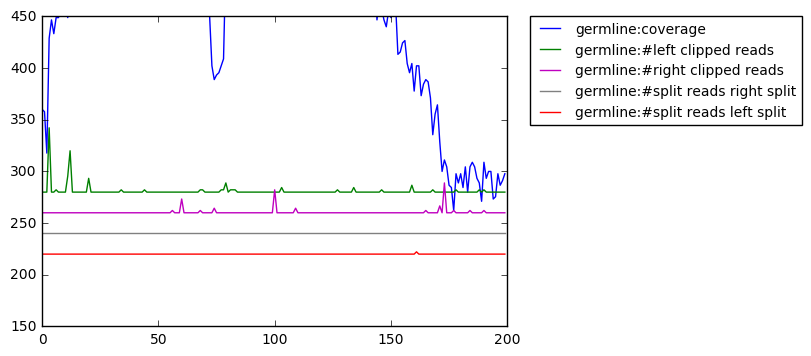

id: 115
Nanopore: noSV


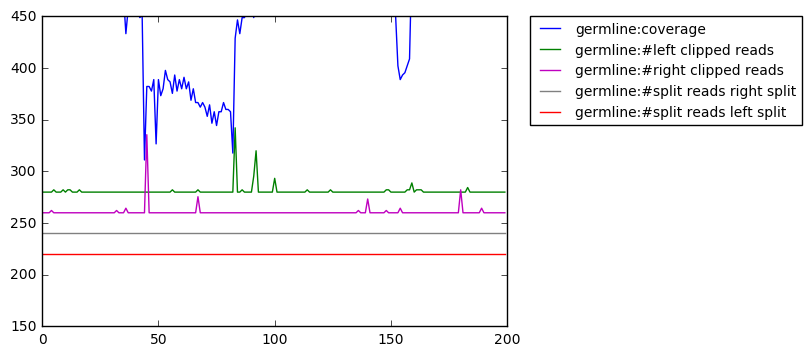

id: 116
Nanopore: noSV


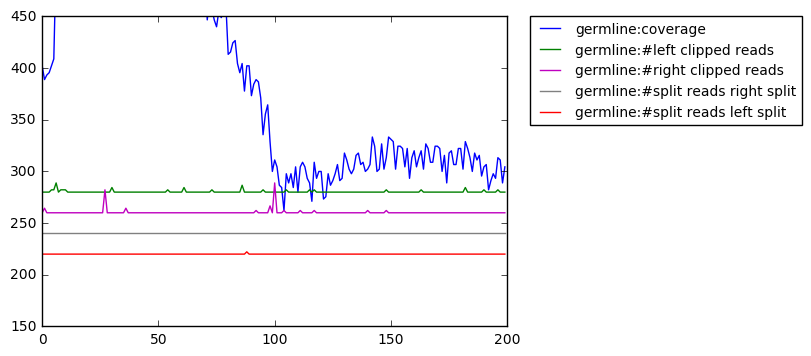

id: 117
Nanopore: noSV


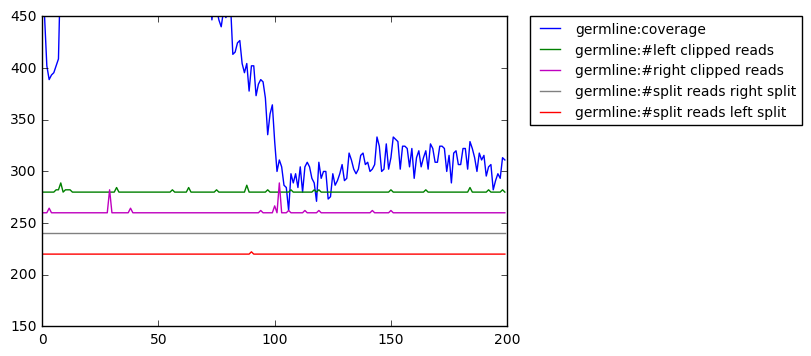

id: 118
Nanopore: noSV


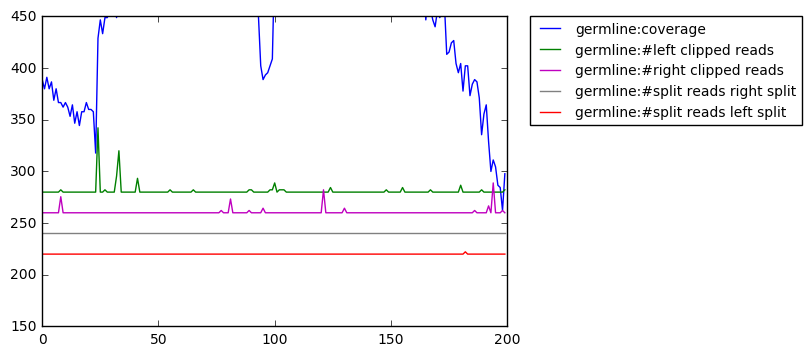

id: 119
Nanopore: noSV


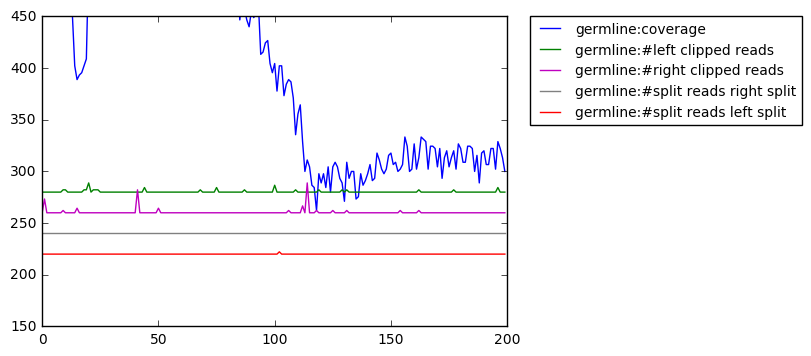

id: 120
Nanopore: noSV


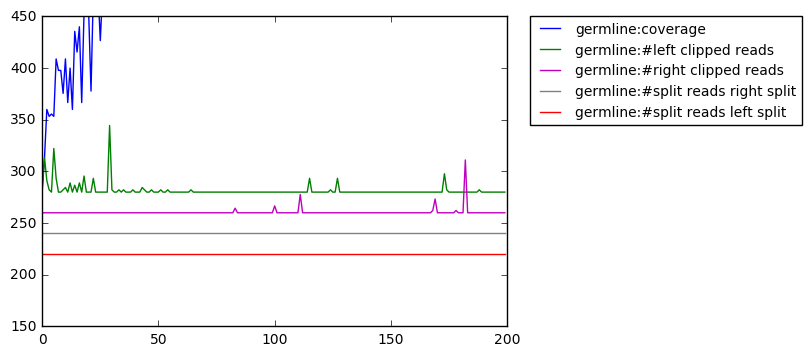

id: 121
Nanopore: noSV


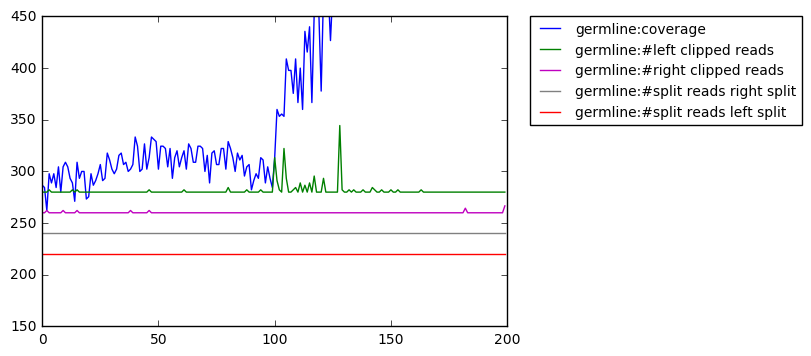

id: 122
Nanopore: noSV


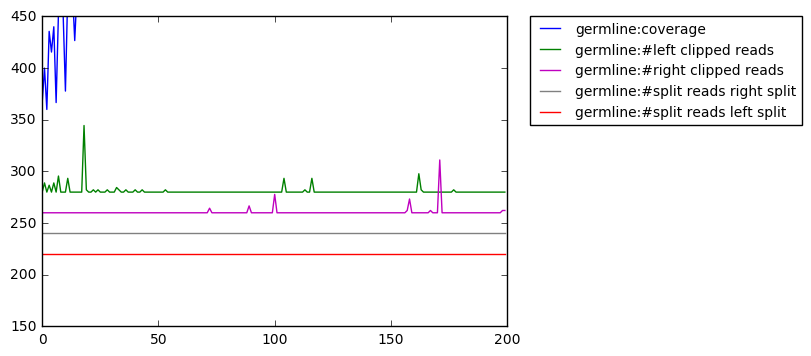

id: 123
Nanopore: noSV


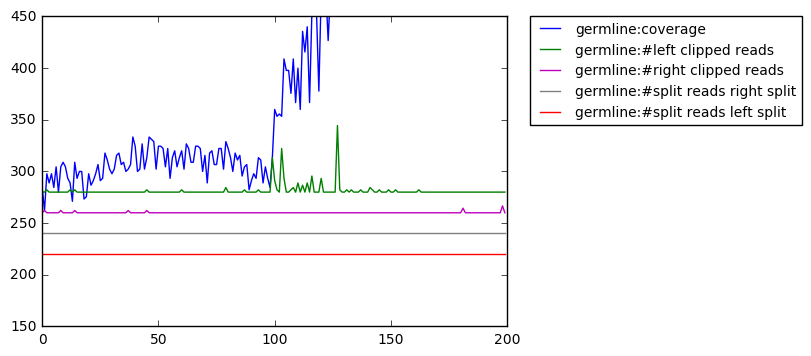

id: 124
Nanopore: noSV


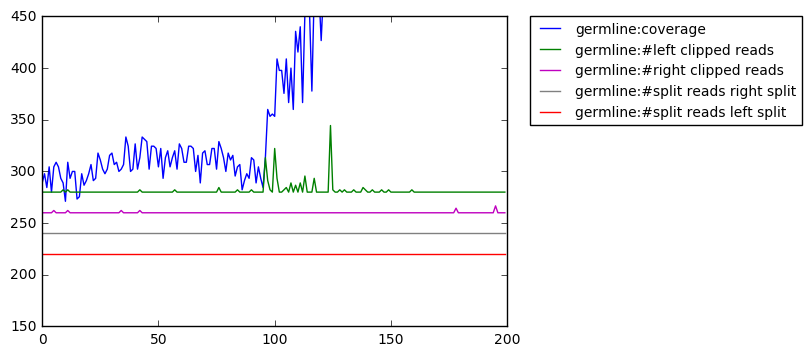

id: 125
Nanopore: noSV


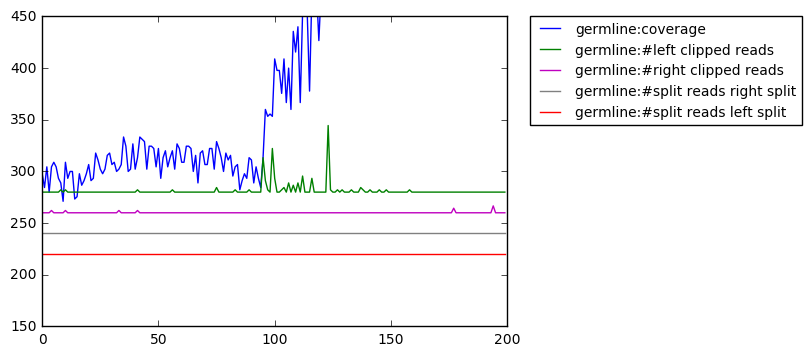

id: 126
Nanopore: noSV


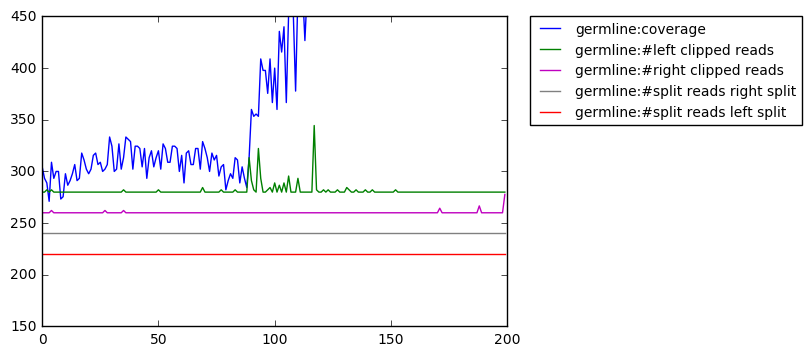

id: 127
Nanopore: noSV


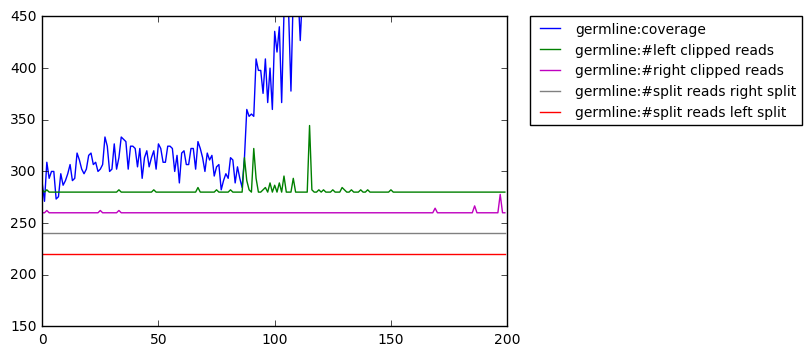

id: 128
Nanopore: noSV


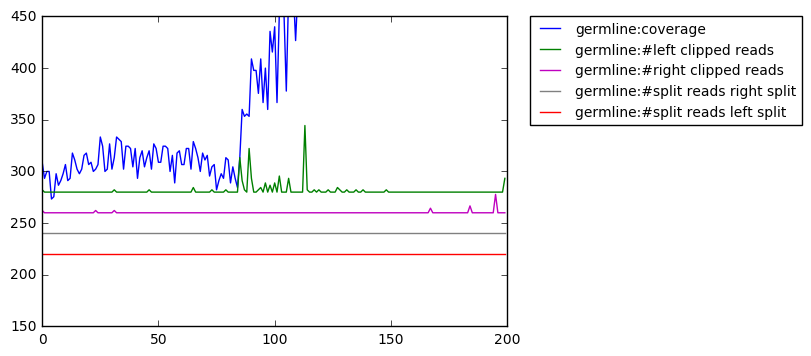

id: 129
Nanopore: noSV


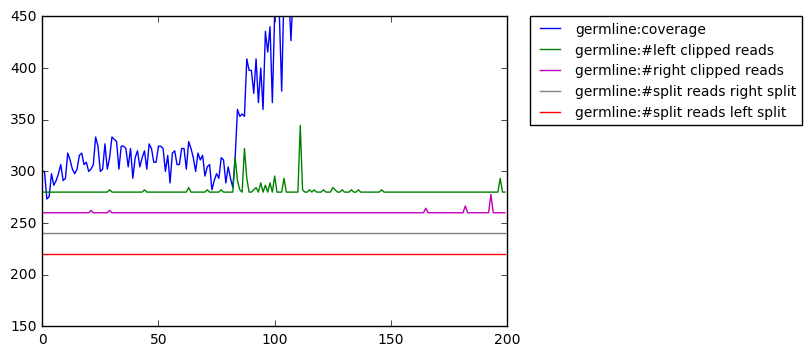

id: 130
Nanopore: noSV


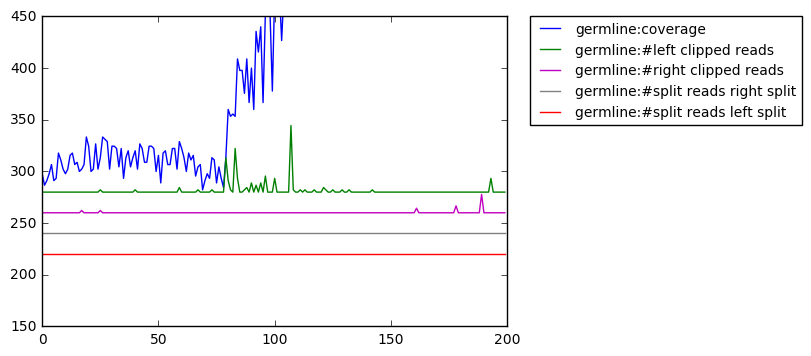

id: 131
Nanopore: noSV


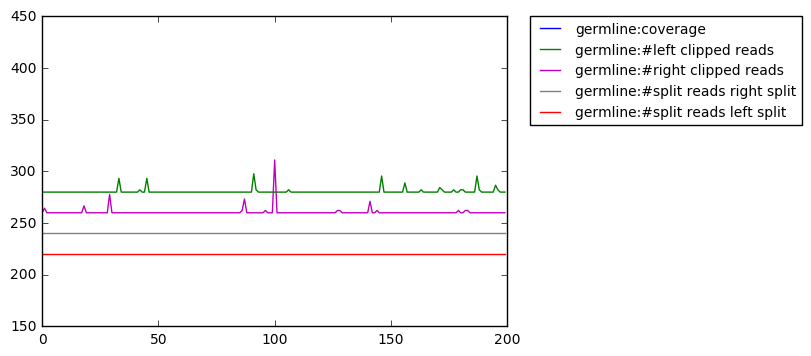

id: 132
Nanopore: noSV


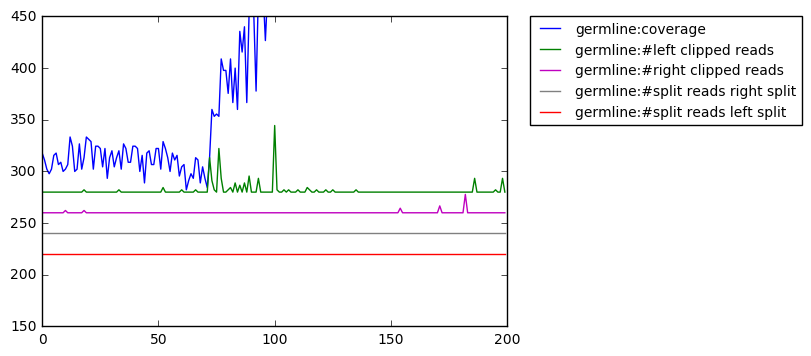

id: 133
Nanopore: noSV


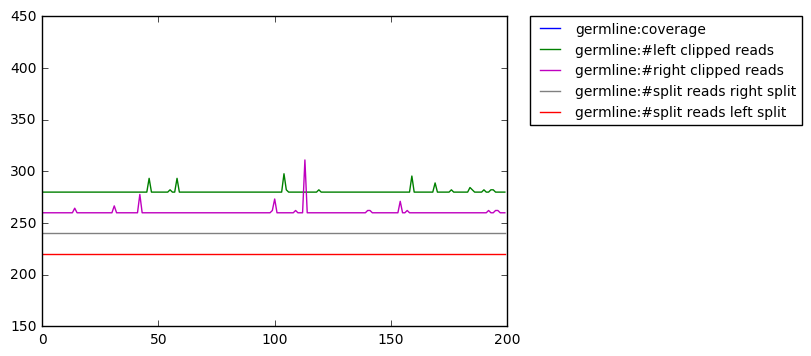

id: 134
Nanopore: noSV


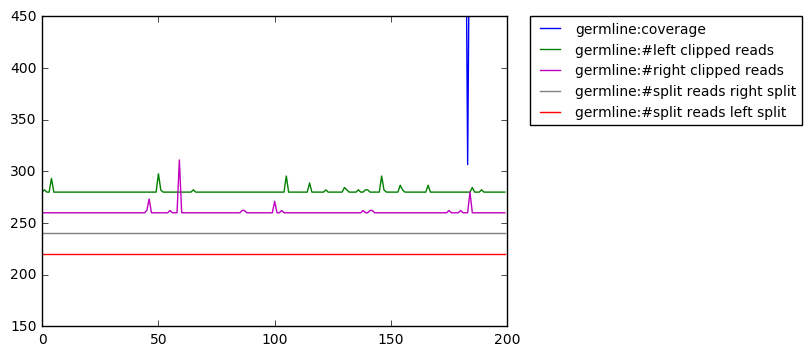

id: 135
Nanopore: noSV


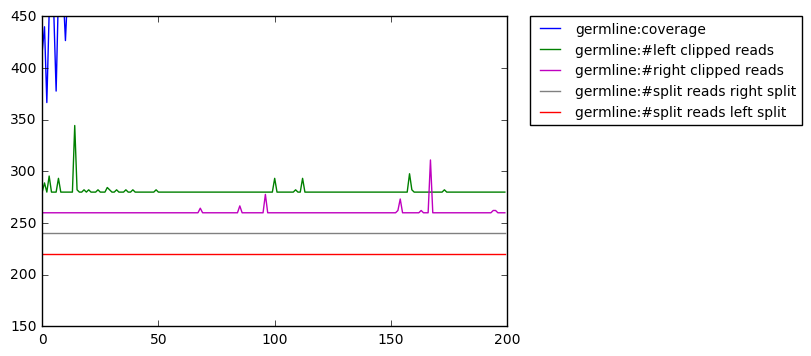

id: 136
Nanopore: noSV


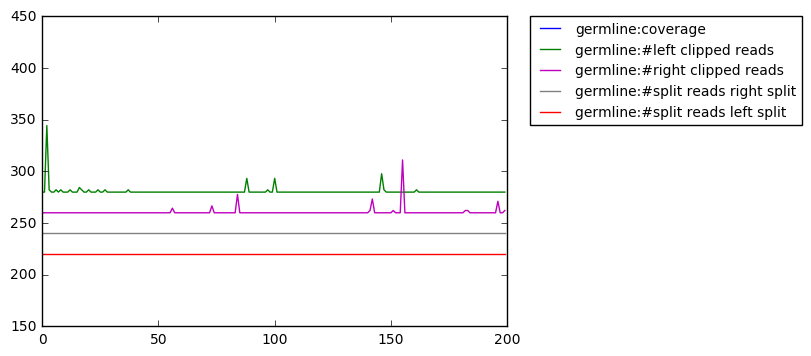

id: 137
Nanopore: noSV


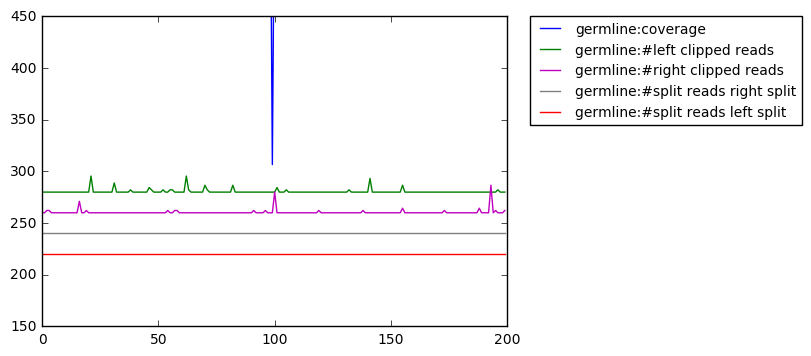

id: 138
Nanopore: noSV


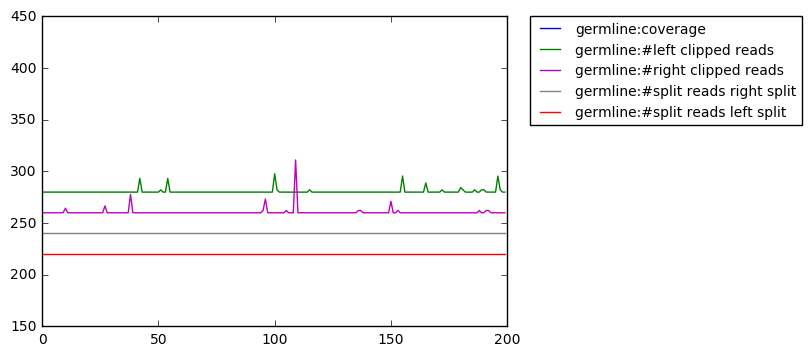

id: 139
Nanopore: noSV


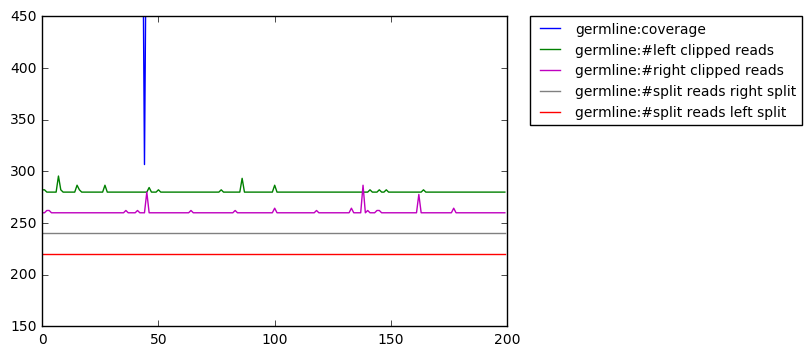

id: 140
Nanopore: noSV


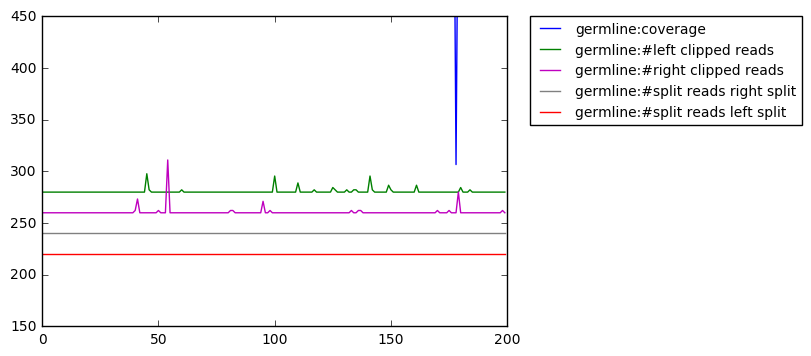

id: 141
Nanopore: noSV


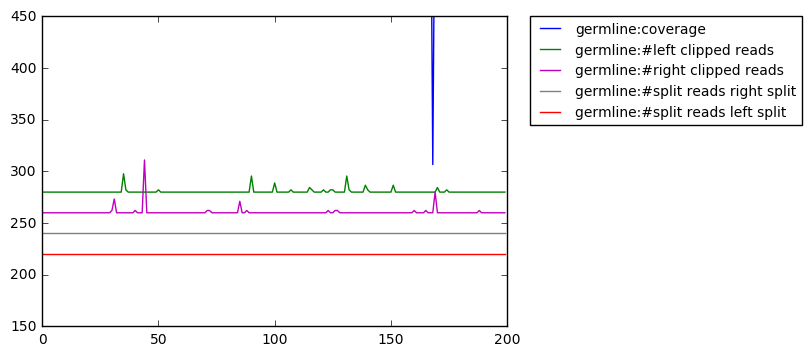

id: 142
Nanopore: noSV


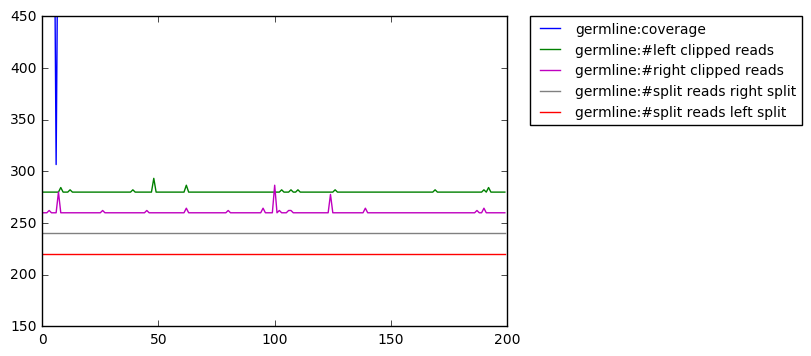

id: 143
Nanopore: noSV


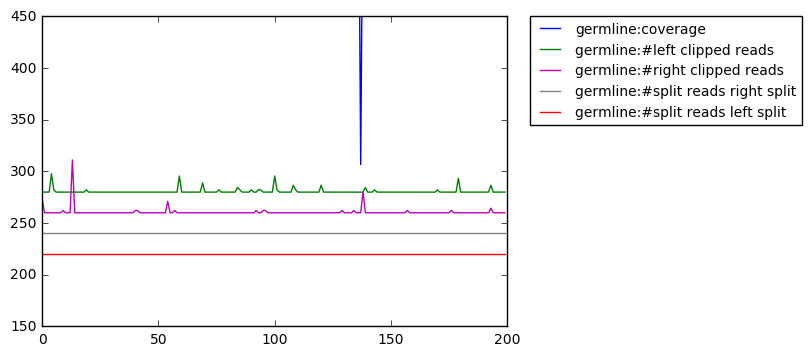

id: 144
Nanopore: noSV


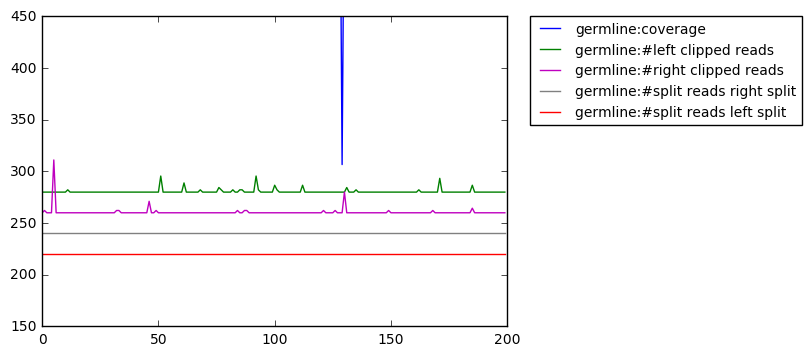

id: 145
Nanopore: noSV


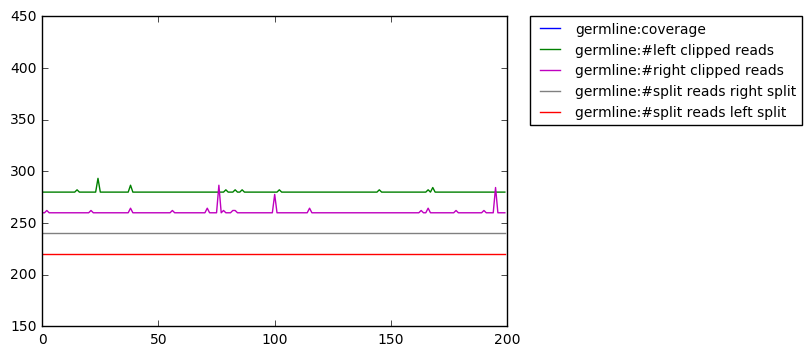

id: 146
Nanopore: noSV


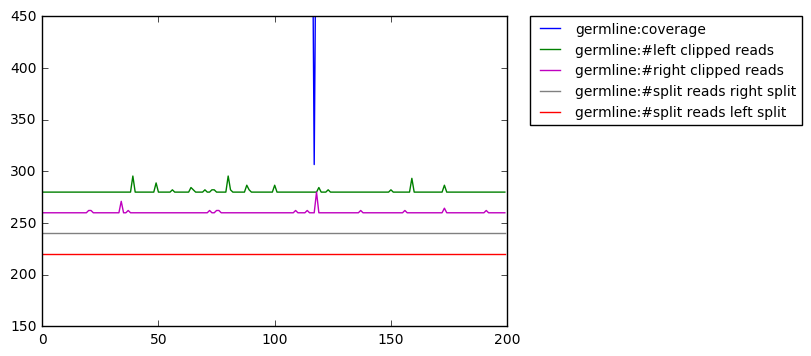

id: 147
Nanopore: noSV


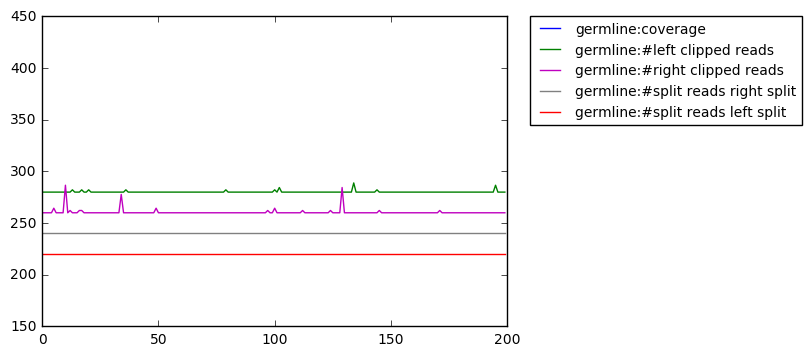

id: 148
Nanopore: noSV


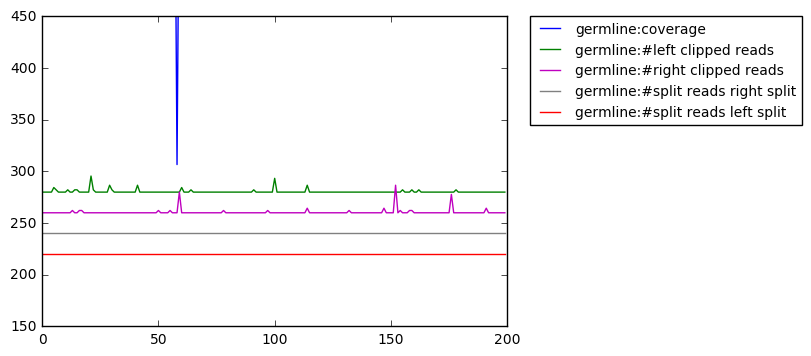

id: 149
Nanopore: noSV


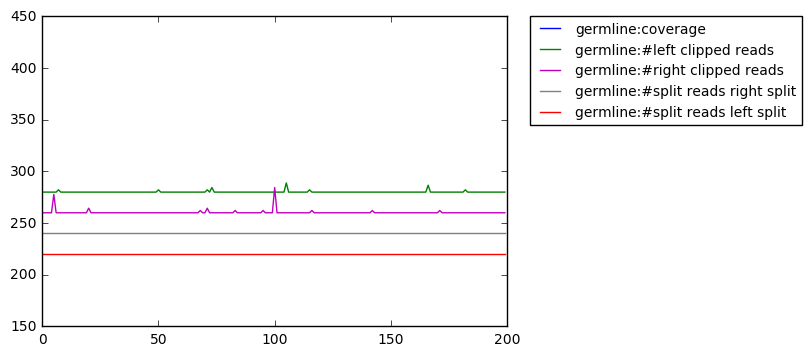

id: 150
Nanopore: noSV


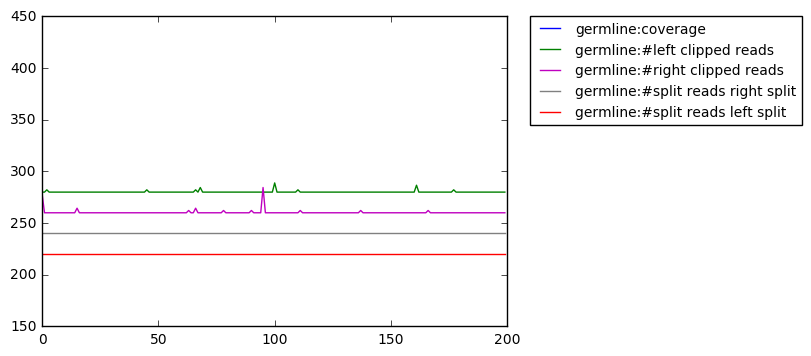

id: 151
Nanopore: noSV


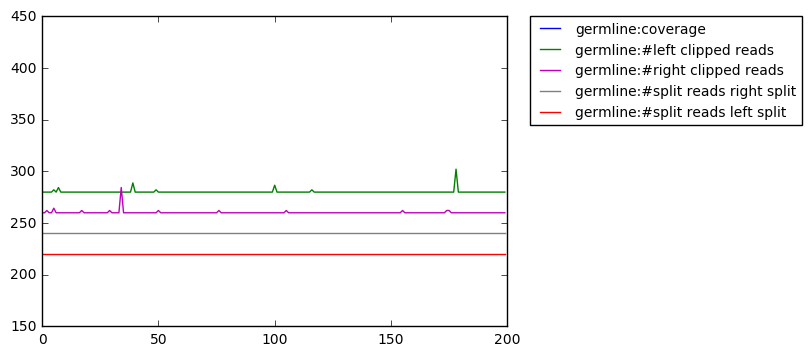

id: 152
Nanopore: noSV


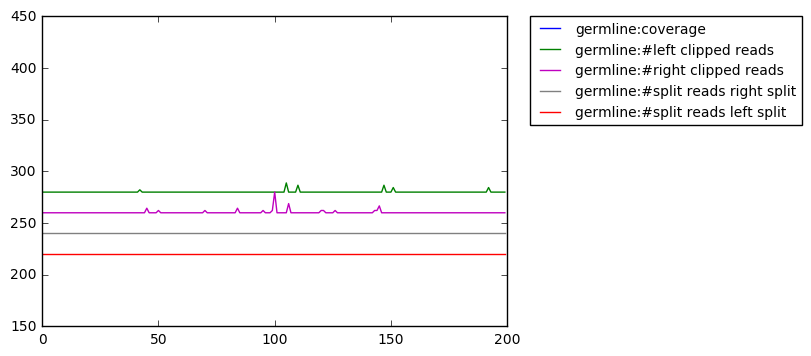

id: 153
Nanopore: noSV


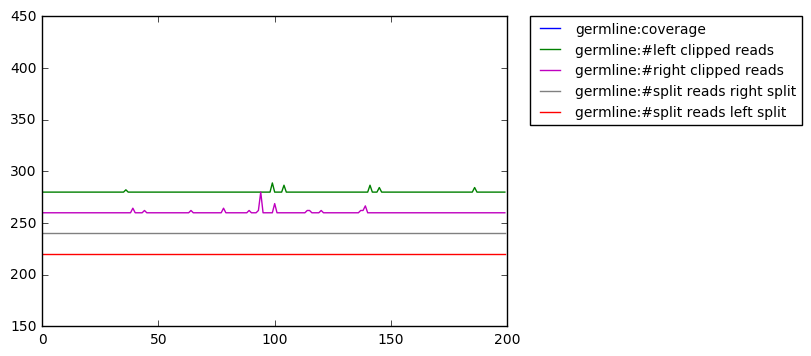

id: 154
Nanopore: noSV


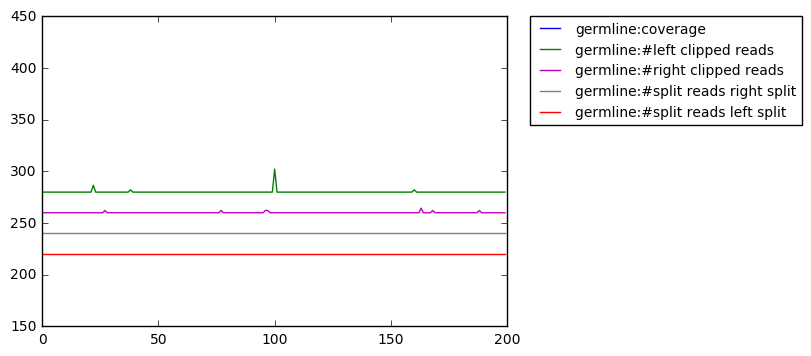

id: 155
Nanopore: noSV


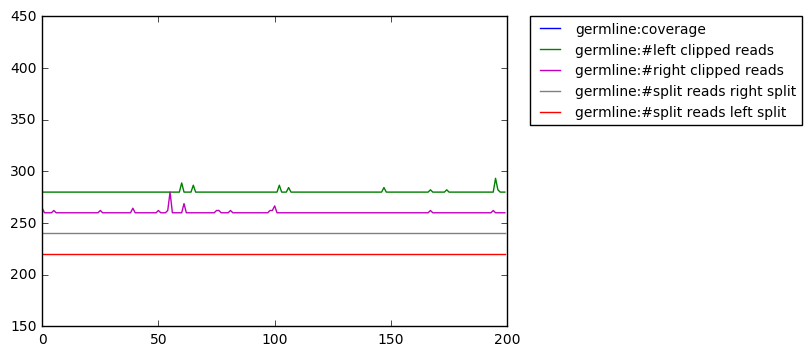

id: 156
Nanopore: noSV


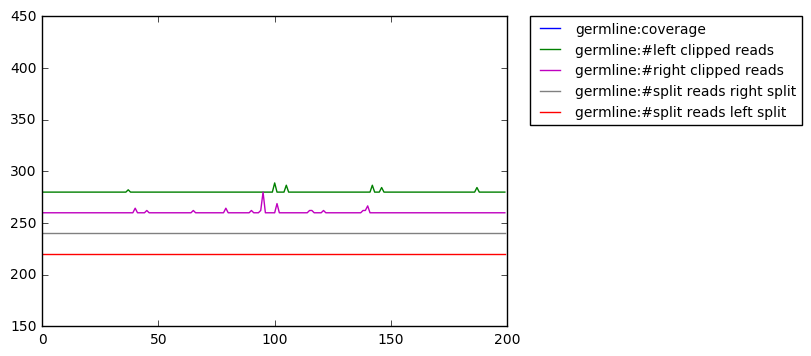

id: 157
Nanopore: noSV


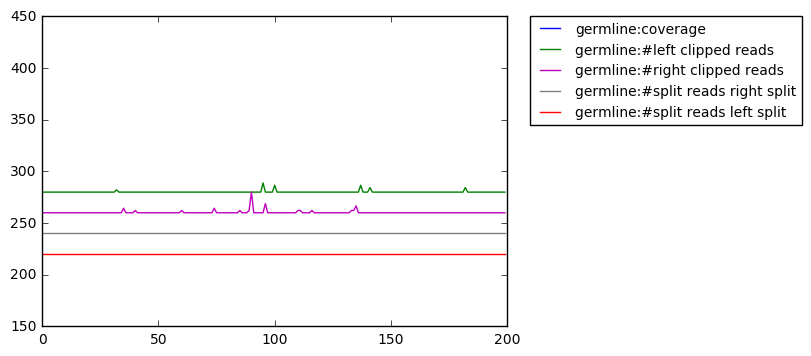

id: 158
Nanopore: noSV


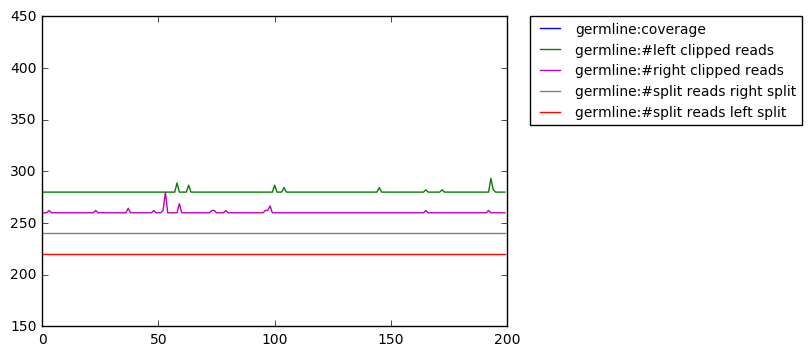

id: 159
Nanopore: noSV


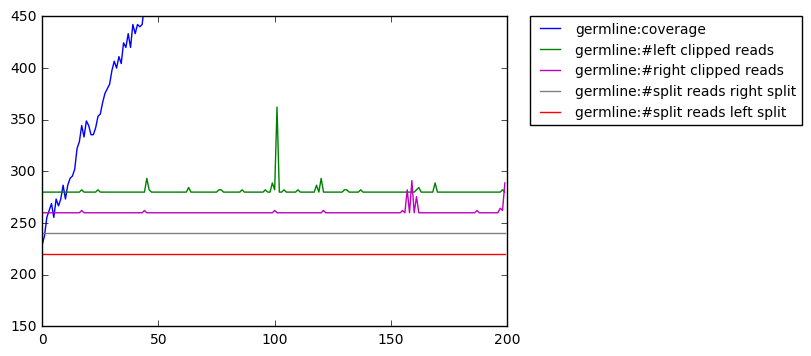

id: 160
Nanopore: noSV


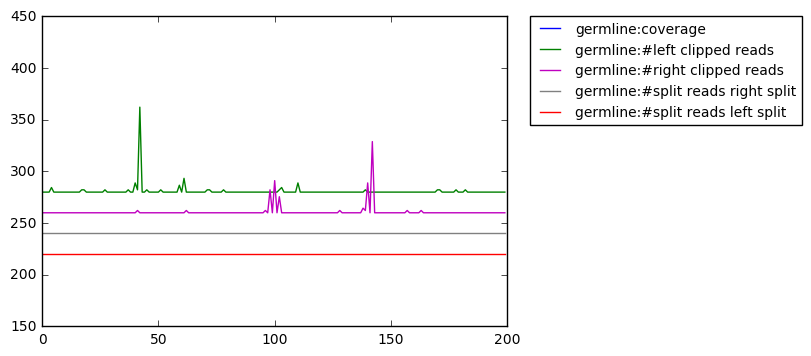

id: 161
Nanopore: noSV


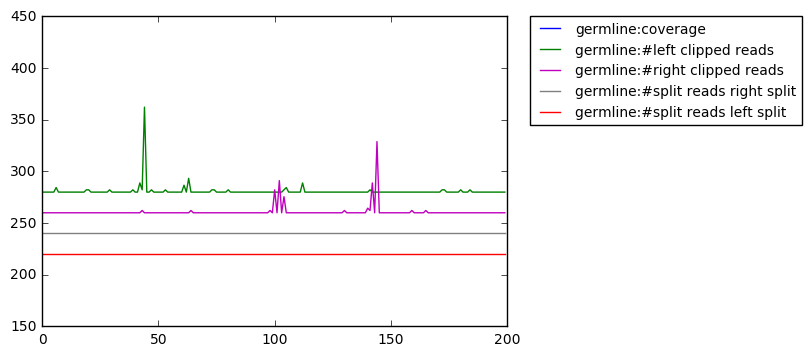

id: 162
Nanopore: noSV


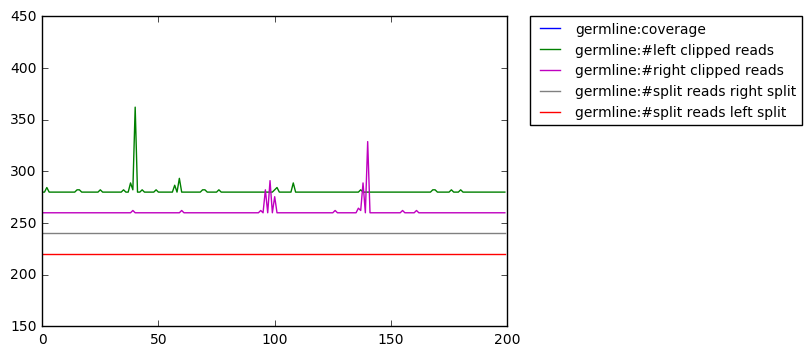

id: 163
Nanopore: noSV


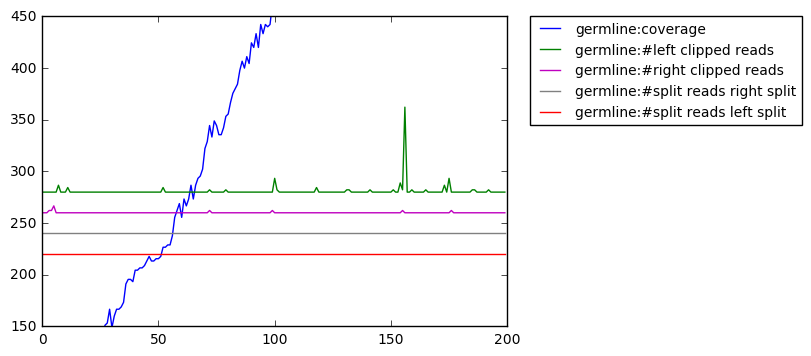

id: 164
Nanopore: noSV


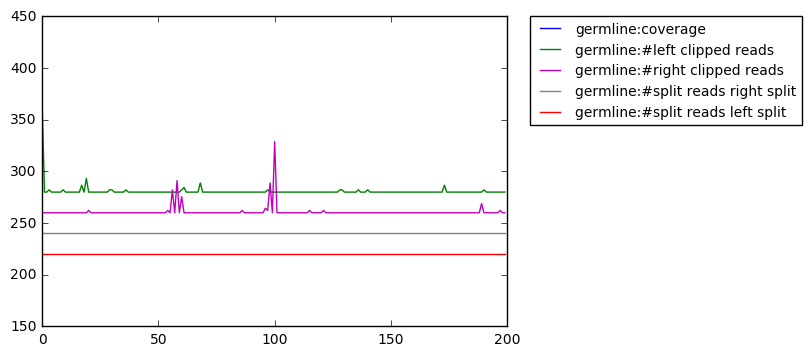

id: 165
Nanopore: noSV


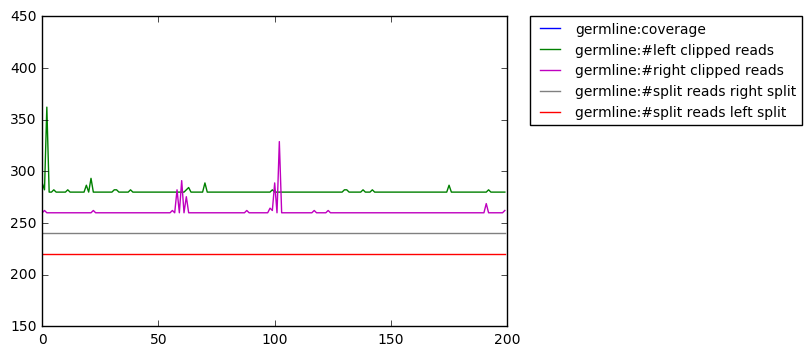

id: 166
Nanopore: noSV


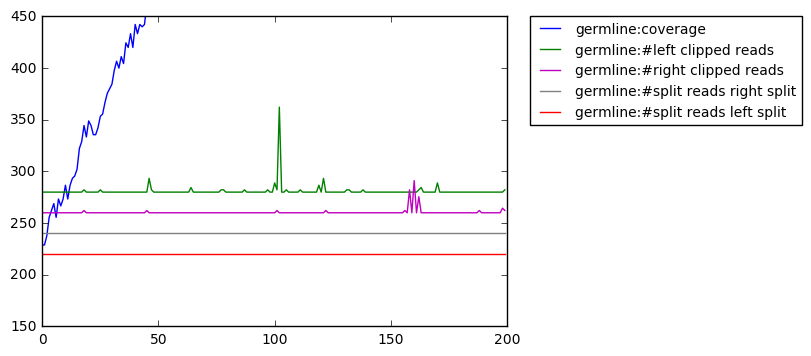

id: 167
Nanopore: noSV


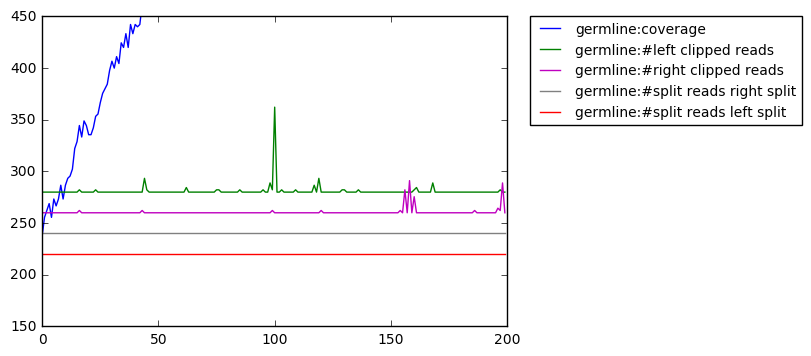

id: 168
Nanopore: noSV


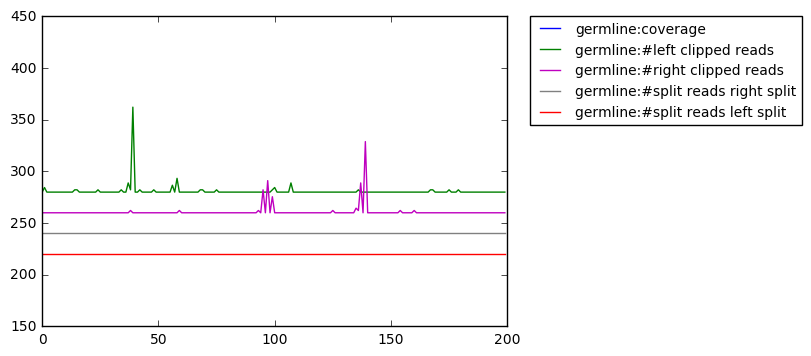

id: 169
Nanopore: noSV


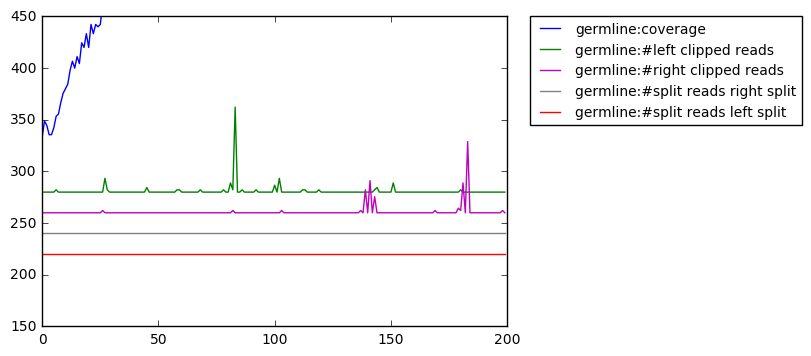

id: 170
Nanopore: noSV


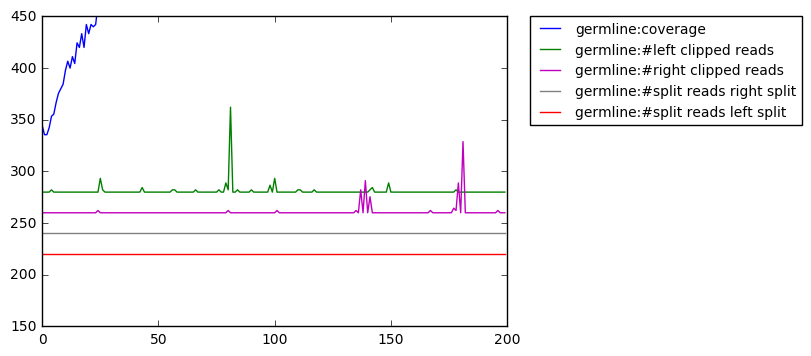

id: 171
Nanopore: noSV


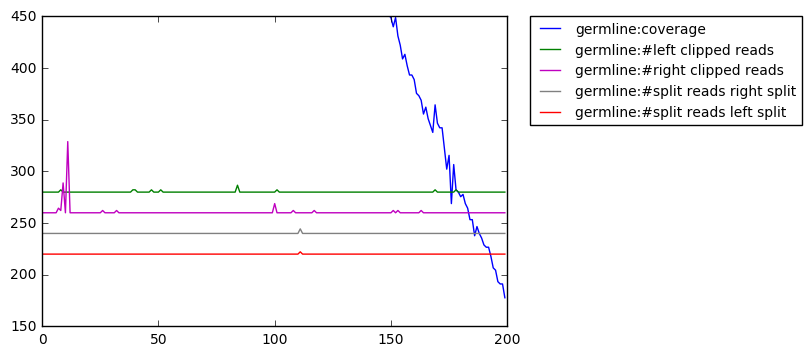

id: 172
Nanopore: noSV


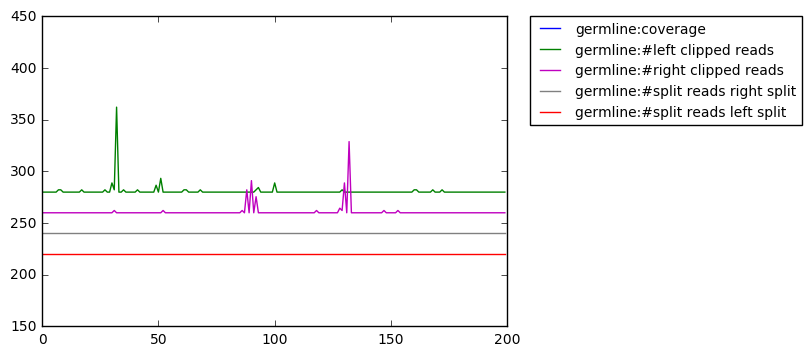

id: 173
Nanopore: noSV


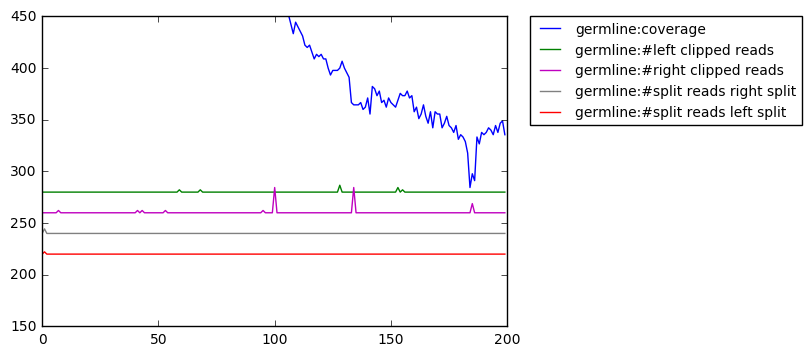

id: 174


IndexError: index 174 is out of bounds for axis 0 with size 174

In [64]:
start_window = 0
n_windows = 500
plot_channels(start_window, n_windows)

In [ ]:
n_windows = 280
start_window = 3000
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [66]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

50


## Prepare the labels in McFly format

In [53]:
mapclasses = {'DEL_start': 1, 'DEL_end': 0,  'noSV': 2}
print(mapclasses)

{'noSV': 2, 'DEL_start': 1, 'DEL_end': 0}


In [54]:
y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

In [55]:
y_test_binary

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [56]:
y_val_binary

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [57]:
X_train.shape

(8000, 50, 5)

## Use trained neural network on synthetic data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [ ]:
import imp
imp.find_module("mcfly")

In [ ]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

In [ ]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 3,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_filters = 3, 
                                  cnn_max_filters = 3, 
                                  cnn_min_fc_nodes=2, 
                                  cnn_max_fc_nodes=2,
                                  low_lr=2, high_lr=2)

In [ ]:
%%time
for model, params, model_types in models:
    print(params)
    model.summary()

## Reload the trained model

In [58]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_20_07_18')
model_reloaded = load_model(model_path)

## Inspect model predictions on test data

In [59]:

model = model_reloaded
datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=1)

## Columns are predicted labels by DeepSV, rows are nanopore labels

In [60]:
mapclasses = {'DEL_end': 0, 'DEL_start': 1, 'noSV': 2}
dict=mapclasses
dict_sorted = sorted(dict.items(), key=lambda x: x[1])
dict_sorted

[('DEL_end', 0), ('DEL_start', 1), ('noSV', 2)]

In [61]:
labels = [i[0] for i in dict_sorted]

In [62]:
import pandas as pd
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

DEL_end  DEL_start  noSV
DEL_end        370        266    27
DEL_start      207        375    47
noSV           918        932   150

## Test best current model on testset

### Overall accuracy on the test set:

In [63]:
%%time
score_test = model_reloaded.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [3.561698209037178, 0.27187120292973982]
Wall time: 334 ms
